# **Loan Default Prediction**

## **Problem Definition**

### **The Context:**

 - A bank's consumer credit department aims to simplify the decision-making process for home equity lines of credit to be accepted. To accomplish that, they will adopt the Equal Credit Opportunity Act's guidelines to establish an empirically derived and statistically sound model for credit approval scoring. The model will be based on the data obtained via the existing loan underwriting process from recent 5,960 applicants who have been approved for a home equity line/loan of credit. 12 input variables were registered for each applicant with 20% (1189 cases) of cases resulting in adverse or defaulted outcome. A comfortable range of default for banks is 3 to 5 percent based on national average.

### **The objective:**

 - The objective is to build a classification model using predictive modeling techniques to predict clients who are likely to default on their loan and give recommendations to the bank on the important features to consider while approving a loan. The model created must be interpretable enough to provide a justification for any adverse behavior (rejections) in compliance with ECOA.
The end goal of the predictive model is to reduce default rate of 20% to an industry standard of 3% and reduce company losses in the process.

### **The key questions:**

- Can classification model predict loan defaults?
- What variables have the most significant effect on the decision to approve/deny a loan?

### **The problem formulation**:


- Reduce 20% default rate to an industry standard of 3% and reduce company losses in the process thru predictive model that would allow for easier and cost effective loan decision.

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property.

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts)

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments).

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due).

* **CLAGE:** Age of the oldest credit line in months.

* **NINQ:** Number of recent credit inquiries.

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## <b>Important Notes</b>

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for the Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise.

- In the notebook, there are markdowns cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques.

### **Import the necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

### **Read the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
hm=pd.read_csv('/content/drive/MyDrive/Python Course/hmeq.csv')

In [ ]:
# Copying data to another variable to avoid any changes to original data
data=hm.copy()

### **Print the first and last 5 rows of the dataset**

In [ ]:
import pandas as pd


# Add values from LOAN and MORTDUE columns
data['CLTV'] = data['LOAN'] + data['MORTDUE']

# Divide the result by the VALUE column
data['CLTV'] = (data['CLTV'] / data['VALUE'])* 100  # Multiply by 100 to get percentage

#Display the updated Data
print(data['CLTV'])


0        69.083921
1       104.317251
2        89.820359
3              NaN
4        88.839286
           ...    
5955    162.071298
5956    154.487448
5957    154.152856
5958    152.589238
5959    155.970720
Name: CLTV, Length: 5960, dtype: float64


In [ ]:
# Display first five rows
data.head()

BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0    1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1    1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2    1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3    1  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4    0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO  DEBTINC        CLTV  
0   94.366667   1.0   9.0      NaN   69.083921  
1  121.833333   0.0  14.0      NaN  104.317251  
2  149.466667   1.0  10.0      NaN   89.820359  
3         NaN   NaN   NaN      NaN         NaN  
4   93.333333   0.0  14.0      NaN   88.839286

In [ ]:
# Display last 5 rows
data.tail()

BAD   LOAN  MORTDUE    VALUE   REASON    JOB   YOJ  DEROG  DELINQ  \
5955    0  88900  57264.0  90185.0  DebtCon  Other  16.0    0.0     0.0   
5956    0  89000  54576.0  92937.0  DebtCon  Other  16.0    0.0     0.0   
5957    0  89200  54045.0  92924.0  DebtCon  Other  15.0    0.0     0.0   
5958    0  89800  50370.0  91861.0  DebtCon  Other  14.0    0.0     0.0   
5959    0  89900  48811.0  88934.0  DebtCon  Other  15.0    0.0     0.0   

           CLAGE  NINQ  CLNO    DEBTINC        CLTV  
5955  221.808718   0.0  16.0  36.112347  162.071298  
5956  208.692070   0.0  15.0  35.859971  154.487448  
5957  212.279697   0.0  15.0  35.556590  154.152856  
5958  213.892709   0.0  16.0  34.340882  152.589238  
5959  219.601002   0.0  16.0  34.571519  155.970720

In [ ]:
data.head(30)

BAD  LOAN   MORTDUE     VALUE   REASON      JOB   YOJ  DEROG  DELINQ  \
0     1  1100   25860.0   39025.0  HomeImp    Other  10.5    0.0     0.0   
1     1  1300   70053.0   68400.0  HomeImp    Other   7.0    0.0     2.0   
2     1  1500   13500.0   16700.0  HomeImp    Other   4.0    0.0     0.0   
3     1  1500       NaN       NaN      NaN      NaN   NaN    NaN     NaN   
4     0  1700   97800.0  112000.0  HomeImp   Office   3.0    0.0     0.0   
5     1  1700   30548.0   40320.0  HomeImp    Other   9.0    0.0     0.0   
6     1  1800   48649.0   57037.0  HomeImp    Other   5.0    3.0     2.0   
7     1  1800   28502.0   43034.0  HomeImp    Other  11.0    0.0     0.0   
8     1  2000   32700.0   46740.0  HomeImp    Other   3.0    0.0     2.0   
9     1  2000       NaN   62250.0  HomeImp    Sales  16.0    0.0     0.0   
10    1  2000   22608.0       NaN      NaN      NaN  18.0    NaN     NaN   
11    1  2000   20627.0   29800.0  HomeImp   Office  11.0    0.0     1.0   
12    1  2000   45000.0   55000.0  HomeImp    Other   3.0    0.0     0.0   
13    0  2000   64536.0   87400.0      NaN      Mgr   2.5    0.0     0.0   
14    1  2100   71000.0   83850.0  HomeImp    Other   8.0    0.0     1.0   
15    1  2200   24280.0   34687.0  HomeImp    Other   NaN    0.0     1.0   
16    1  2200   90957.0  102600.0  HomeImp      Mgr   7.0    2.0     6.0   
17    1  2200   23030.0       NaN      NaN      NaN  19.0    NaN     NaN   
18    1  2300   28192.0   40150.0  HomeImp    Other   4.5    0.0     0.0   
19    0  2300  102370.0  120953.0  HomeImp   Office   2.0    0.0     0.0   
20    1  2300   37626.0   46200.0  HomeImp    Other   3.0    0.0     1.0   
21    1  2400   50000.0   73395.0  HomeImp  ProfExe   5.0    1.0     0.0   
22    1  2400   28000.0   40800.0  HomeImp      Mgr  12.0    0.0     0.0   
23    1  2400   18000.0       NaN  HomeImp      Mgr  22.0    NaN     2.0   
24    1  2400       NaN   17180.0  HomeImp    Other   NaN    0.0     0.0   
25    1  2400   34863.0   47471.0  HomeImp      Mgr  12.0    0.0     0.0   
26    0  2400   98449.0  117195.0  HomeImp   Office   4.0    0.0     0.0   
27    1  2500   15000.0   20200.0  HomeImp      NaN  18.0    0.0     0.0   
28    1  2500   25116.0   36350.0  HomeImp    Other  10.0    1.0     2.0   
29    0  2500    7229.0   44516.0  HomeImp     Self   NaN    0.0     0.0   

         CLAGE  NINQ  CLNO    DEBTINC        CLTV  
0    94.366667   1.0   9.0        NaN   69.083921  
1   121.833333   0.0  14.0        NaN  104.317251  
2   149.466667   1.0  10.0        NaN   89.820359  
3          NaN   NaN   NaN        NaN         NaN  
4    93.333333   0.0  14.0        NaN   88.839286  
5   101.466002   1.0   8.0  37.113614   79.980159  
6    77.100000   1.0  17.0        NaN   88.449603  
7    88.766030   0.0   8.0  36.884894   70.414091  
8   216.933333   1.0  12.0        NaN   74.240479  
9   115.800000   0.0  13.0        NaN         NaN  
10         NaN   NaN   NaN        NaN         NaN  
11  122.533333   1.0   9.0        NaN   75.929530  
12   86.066667   2.0  25.0        NaN   85.454545  
13  147.133333   0.0  24.0        NaN   76.128146  
14  123.000000   0.0  16.0        NaN   87.179487  
15  300.866667   0.0   8.0        NaN   76.339839  
16  122.900000   1.0  22.0        NaN   90.796296  
17         NaN   NaN   NaN   3.711312         NaN  
18   54.600000   1.0  16.0        NaN   75.945205  
19   90.992533   0.0  13.0  31.588503   86.537746  
20  122.266667   1.0  14.0        NaN   86.419913  
21         NaN   1.0   0.0        NaN   71.394509  
22   67.200000   2.0  22.0        NaN   74.509804  
23  121.733333   0.0  10.0        NaN         NaN  
24   14.566667   3.0   4.0        NaN         NaN  
25   70.491080   1.0  21.0  38.263601   78.496345  
26   93.811775   0.0  13.0  29.681827   86.052306  
27  136.066667   1.0  19.0        NaN   86.633663  
28  276.966667   0.0   9.0        NaN   75.972490  
29  208.000000   0.0  12.0        NaN   21.855063

### **Understand the shape of the dataset**

In [ ]:
# Check the shape of the data
data.shape

(5960, 14)

**Insights **bold text**: dataset has 5960 rows and 13 columns with a some data missing.**

### **Check the data types of the columns**

In [ ]:
# Check info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
 13  CLTV     5357 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 652.0+ KB


**Insights: dataset shows only two columns with complete data. The rest of the columns (11) have incomplete data.**

### **Check for missing values**

In [ ]:
# Analyse missing values
data.isnull()

BAD   LOAN  MORTDUE  VALUE  REASON    JOB    YOJ  DEROG  DELINQ  \
0     False  False    False  False   False  False  False  False   False   
1     False  False    False  False   False  False  False  False   False   
2     False  False    False  False   False  False  False  False   False   
3     False  False     True   True    True   True   True   True    True   
4     False  False    False  False   False  False  False  False   False   
...     ...    ...      ...    ...     ...    ...    ...    ...     ...   
5955  False  False    False  False   False  False  False  False   False   
5956  False  False    False  False   False  False  False  False   False   
5957  False  False    False  False   False  False  False  False   False   
5958  False  False    False  False   False  False  False  False   False   
5959  False  False    False  False   False  False  False  False   False   

      CLAGE   NINQ   CLNO  DEBTINC   CLTV  
0     False  False  False     True  False  
1     False  False  False     True  False  
2     False  False  False     True  False  
3      True   True   True     True   True  
4     False  False  False     True  False  
...     ...    ...    ...      ...    ...  
5955  False  False  False    False  False  
5956  False  False  False    False  False  
5957  False  False  False    False  False  
5958  False  False  False    False  False  
5959  False  False  False    False  False  

[5960 rows x 14 columns]

In [ ]:
data.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
CLTV        603
dtype: int64

In [ ]:
# Check the percentage of missing values in the each column.
data.isnull().sum()/5960

BAD        0.000000
LOAN       0.000000
MORTDUE    0.086913
VALUE      0.018792
REASON     0.042282
JOB        0.046812
YOJ        0.086409
DEROG      0.118792
DELINQ     0.097315
CLAGE      0.051678
NINQ       0.085570
CLNO       0.037248
DEBTINC    0.212584
CLTV       0.101174
dtype: float64

**Insights : the highest number of missing values are in the DebtInc column at 21% with Value showing the lowest amount of missing values. **

**Insights:** *While the total number of missing values can provide numerical representation of the missing values, percentage representation is more visually pleasing and allows to determine whether amount of missing values is significant for proper decision making. The amount of values missing in DebtInc column is concerning as debt to income value is one of the main components in making a loan approval decision. The higher the debt to income percentage, the higher the chances of delinquincy for that loan and with 21% of missing values overfitting of data is at a greater level.*

**We can convert the object type columns to categories**

`converting "objects" to "category" reduces the data space required to store the dataframe`

### **Convert the data types**

In [ ]:
cols = data.select_dtypes(['object']).columns.tolist()

#adding target variable to this list as this is a classification problem and the target variable is categorical

cols.append('BAD')

In [ ]:
cols

['REASON', 'JOB', 'BAD']

In [ ]:
# Changing the data type of object type column to category.
for i in cols:
    data[i] = data[i].astype('category')

In [ ]:
# Checking the info again and the datatype of different variable

print(data[i])

0       1
1       1
2       1
3       1
4       0
       ..
5955    0
5956    0
5957    0
5958    0
5959    0
Name: BAD, Length: 5960, dtype: category
Categories (2, int64): [0, 1]


### **Analyze Summary Statistics of the dataset**

In [ ]:
# Analyze the summary statistics for numerical variables
data.describe().T

count           mean           std          min           25%  \
LOAN     5960.0   18607.969799  11207.480417  1100.000000  11100.000000   
MORTDUE  5442.0   73760.817200  44457.609458  2063.000000  46276.000000   
VALUE    5848.0  101776.048741  57385.775334  8000.000000  66075.500000   
YOJ      5445.0       8.922268      7.573982     0.000000      3.000000   
DEROG    5252.0       0.254570      0.846047     0.000000      0.000000   
DELINQ   5380.0       0.449442      1.127266     0.000000      0.000000   
CLAGE    5652.0     179.766275     85.810092     0.000000    115.116702   
NINQ     5450.0       1.186055      1.728675     0.000000      0.000000   
CLNO     5738.0      21.296096     10.138933     0.000000     15.000000   
DEBTINC  4693.0      33.779915      8.601746     0.524499     29.140031   
CLTV     5357.0      91.405252     43.579158     9.420795     83.892388   

                  50%            75%            max  
LOAN     16300.000000   23300.000000   89900.000000  
MORTDUE  65019.000000   91488.000000  399550.000000  
VALUE    89235.500000  119824.250000  855909.000000  
YOJ          7.000000      13.000000      41.000000  
DEROG        0.000000       0.000000      10.000000  
DELINQ       0.000000       0.000000      15.000000  
CLAGE      173.466667     231.562278    1168.233561  
NINQ         1.000000       2.000000      17.000000  
CLNO        20.000000      26.000000      71.000000  
DEBTINC     34.818262      39.003141     203.312149  
CLTV        90.403101      96.307144     948.750000

In [ ]:
# Check summary for categorical data

data.describe(include=['category']).T

count unique      top  freq
BAD     5960      2        0  4771
REASON  5708      2  DebtCon  3928
JOB     5681      6    Other  2388

**Let's look at the unique values in all the categorical variables**

In [ ]:
# Checking the count of unique values in each categorical column

cols_cat= data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(data[i].value_counts())
    print('*'*40)

Unique values in BAD are :
0    4771
1    1189
Name: BAD, dtype: int64
****************************************
Unique values in REASON are :
DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64
****************************************
Unique values in JOB are :
Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64
****************************************


**Insights**: *Absolute values are a good measure but it makes harder to visualize where relative frequiencies give you percentages that are easier to visualize and present to decision-makers*.

In [ ]:
cols_cat = data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Relative frequencies in', i, 'are:')
    print(data[i].value_counts(normalize=True))
    print('*' * 40)


Relative frequencies in BAD are:
0    0.800503
1    0.199497
Name: BAD, dtype: float64
****************************************
Relative frequencies in REASON are:
DebtCon    0.688157
HomeImp    0.311843
Name: REASON, dtype: float64
****************************************
Relative frequencies in JOB are:
Other      0.420349
ProfExe    0.224608
Office     0.166872
Mgr        0.135011
Self       0.033973
Sales      0.019187
Name: JOB, dtype: float64
****************************************


## **Exploratory Data Analysis (EDA) and Visualization**

## **Univariate Analysis**

Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables

### **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyze the numerical columns.

In [ ]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and return the boxplots and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(data, feature, figsize=(15,10), kde=False, bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)},
                                           figsize = figsize
                                           ) # creating the 2 subplots
    sns.boxplot(
            data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

    #old code below

    #sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    #sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
   #ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
   # ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

#### Using the above function, let's first analyze the Histogram and Boxplot for LOAN

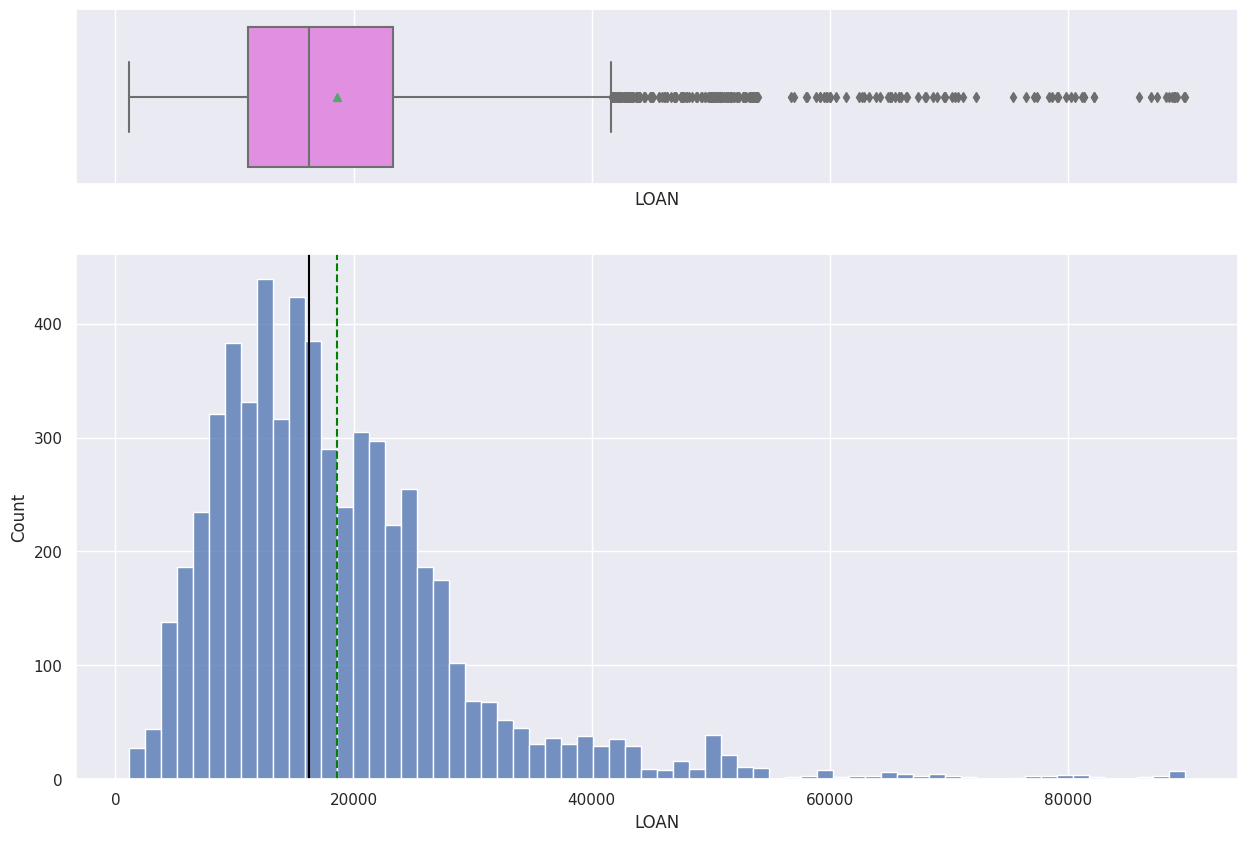

In [ ]:
# Build the histogram boxplot for Loan
histogram_boxplot(data, "LOAN")

**Insights __________**

#### **Note:** As done above, analyze Histogram and Boxplot for other variables

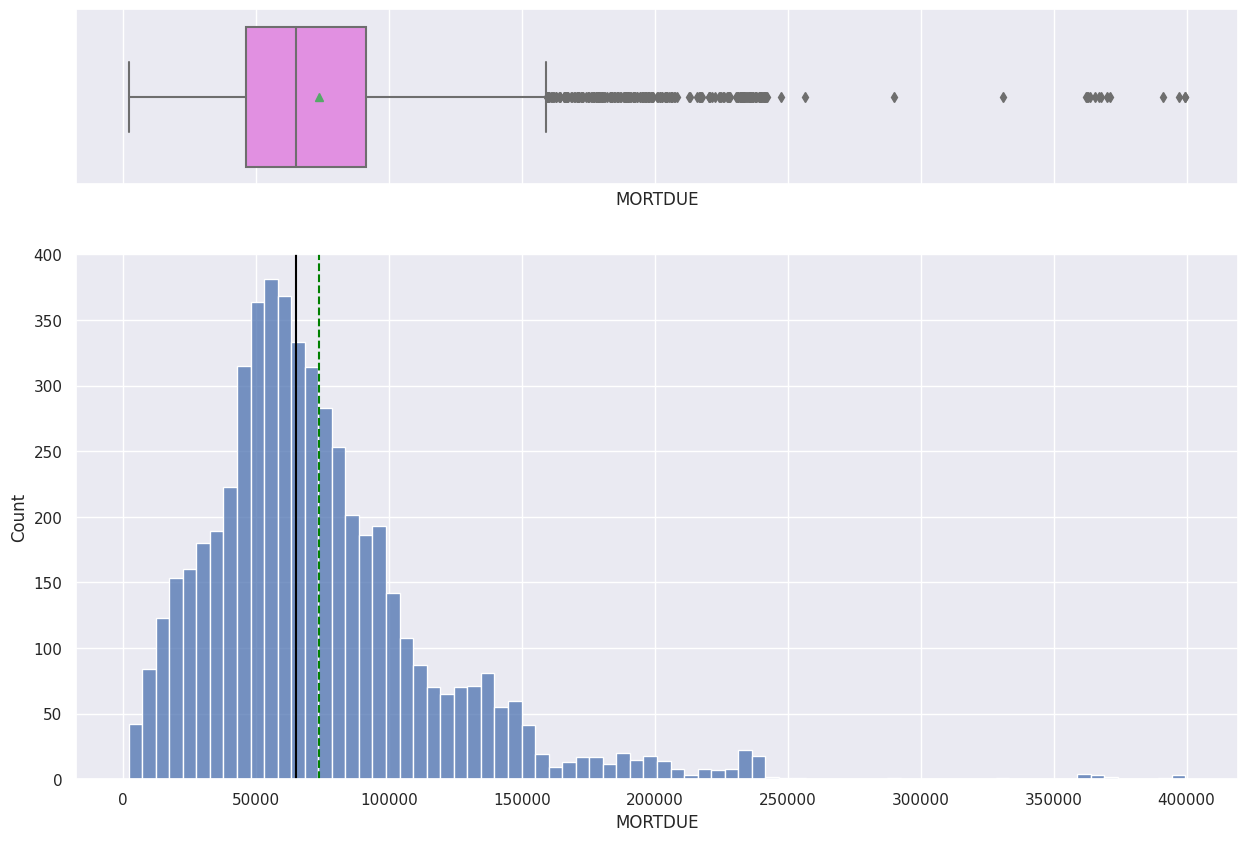

In [ ]:
histogram_boxplot(data,"MORTDUE")

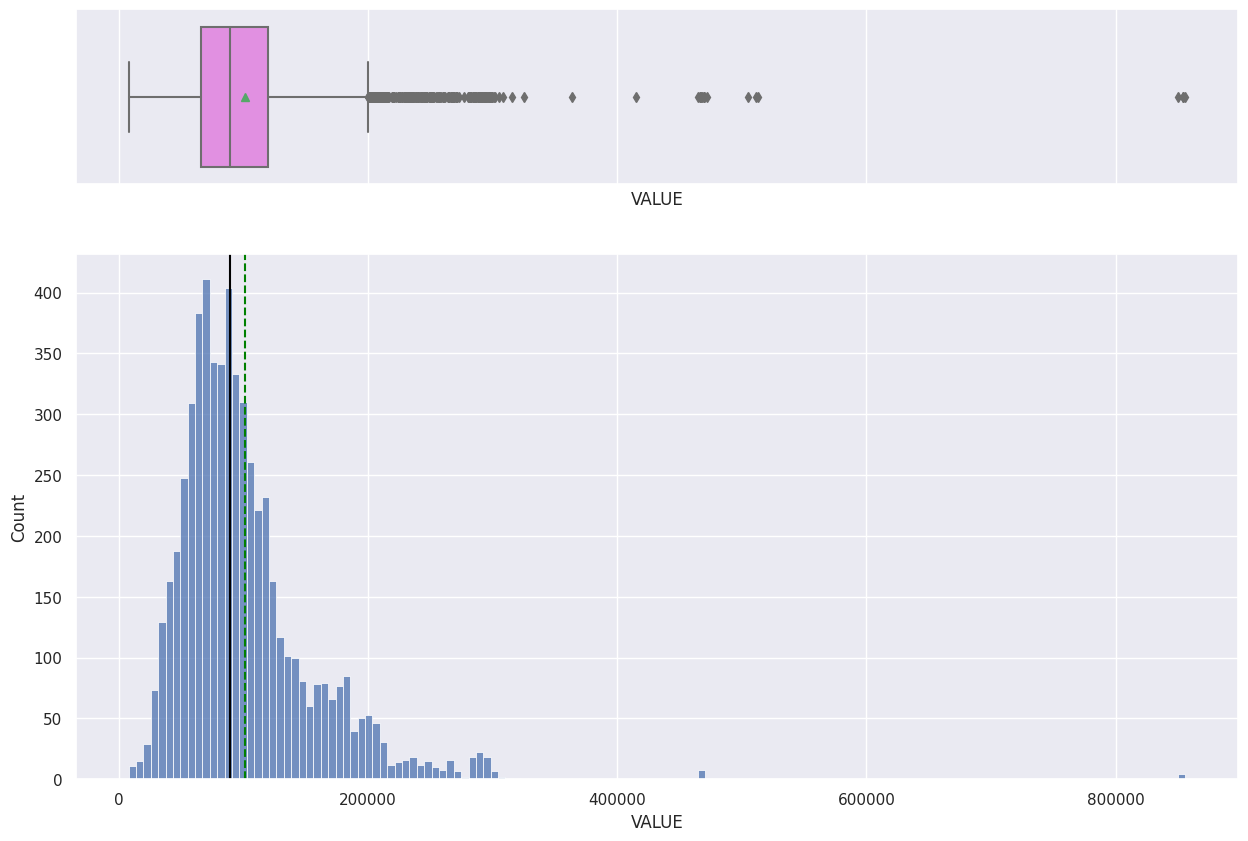

In [ ]:
histogram_boxplot(data,"VALUE")

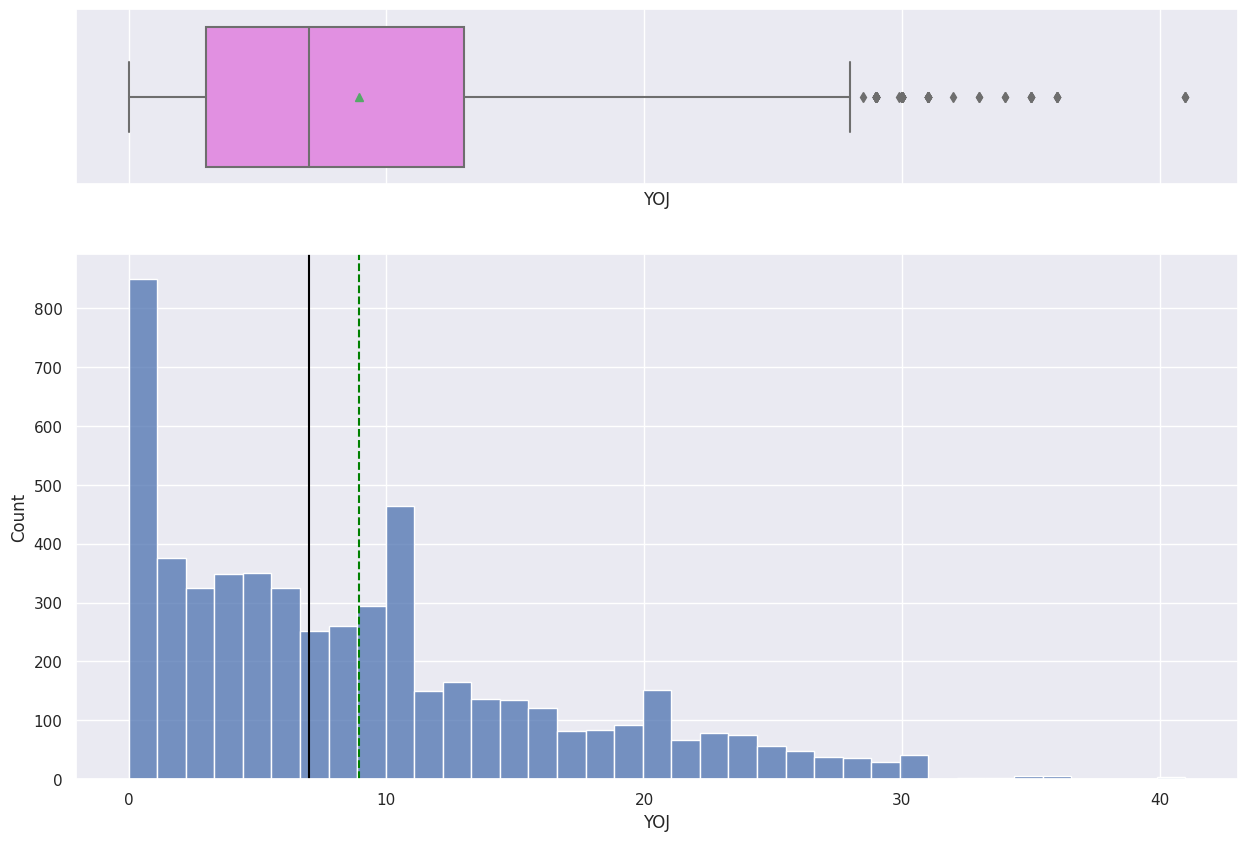

In [ ]:
histogram_boxplot(data,"YOJ")

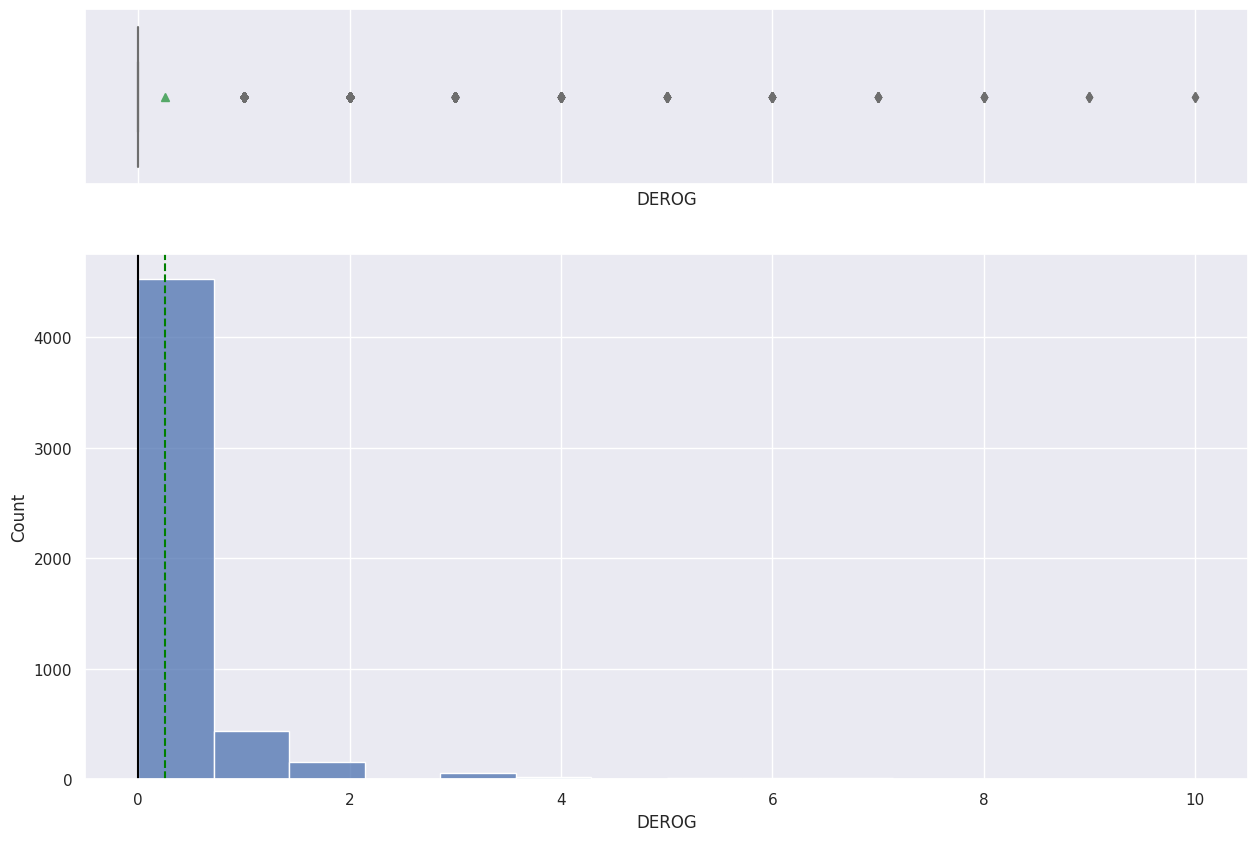

In [ ]:
histogram_boxplot(data,"DEROG")

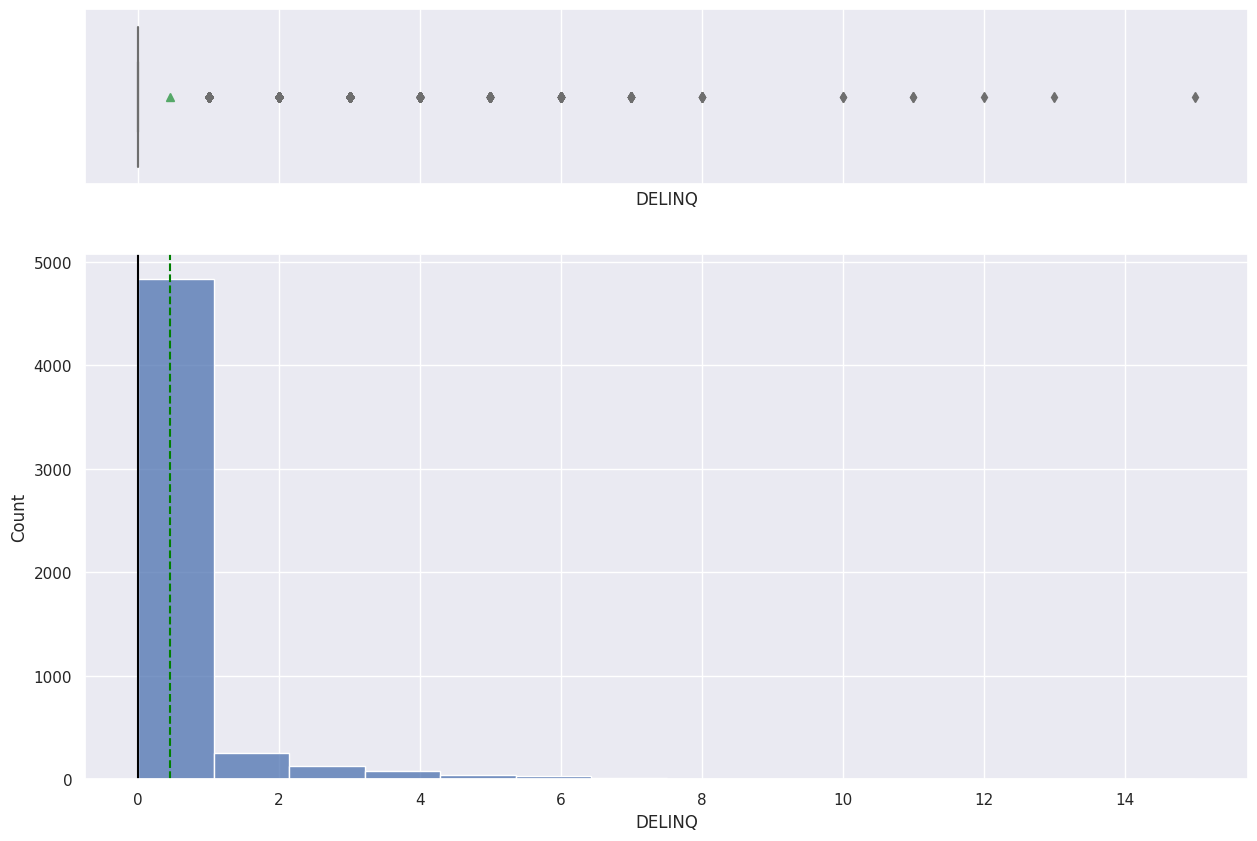

In [ ]:
histogram_boxplot(data,"DELINQ")

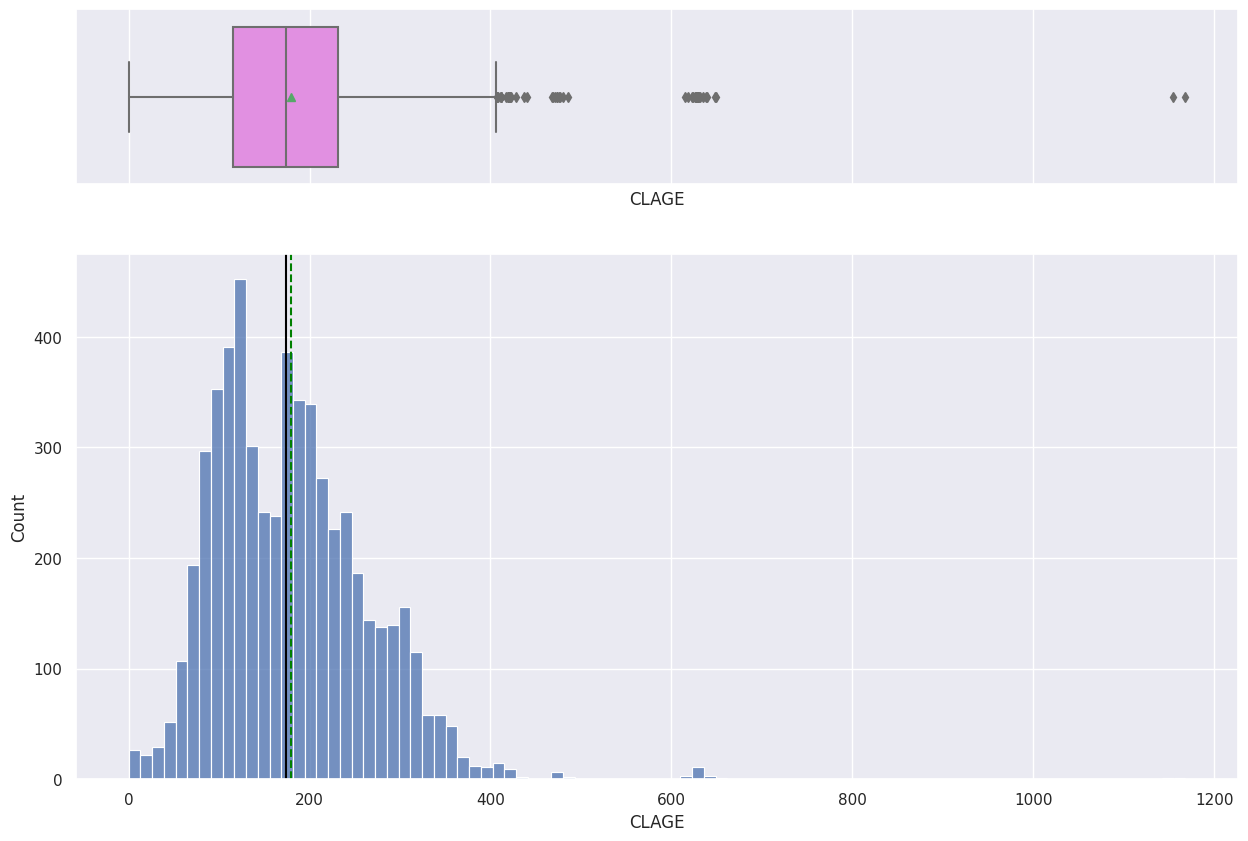

In [ ]:
histogram_boxplot(data,"CLAGE")

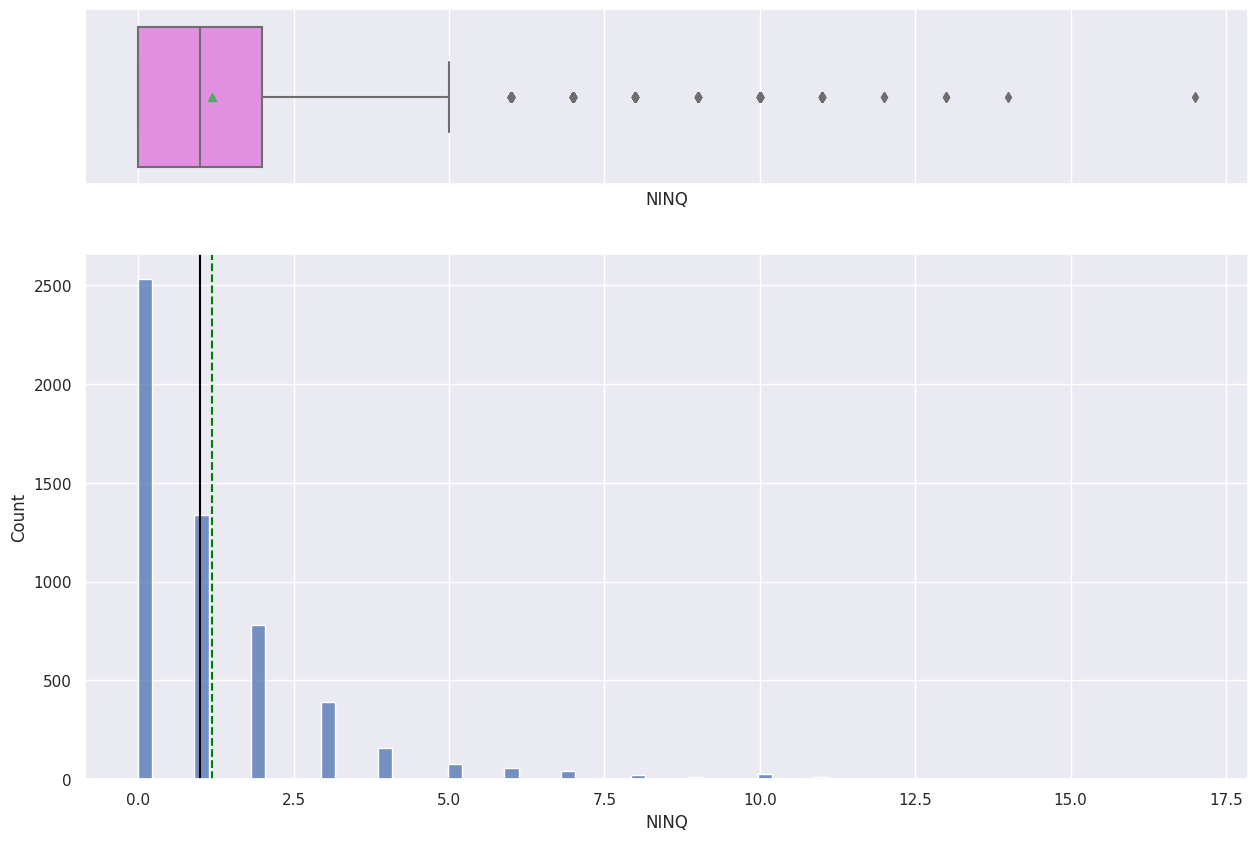

In [ ]:
histogram_boxplot(data,"NINQ")

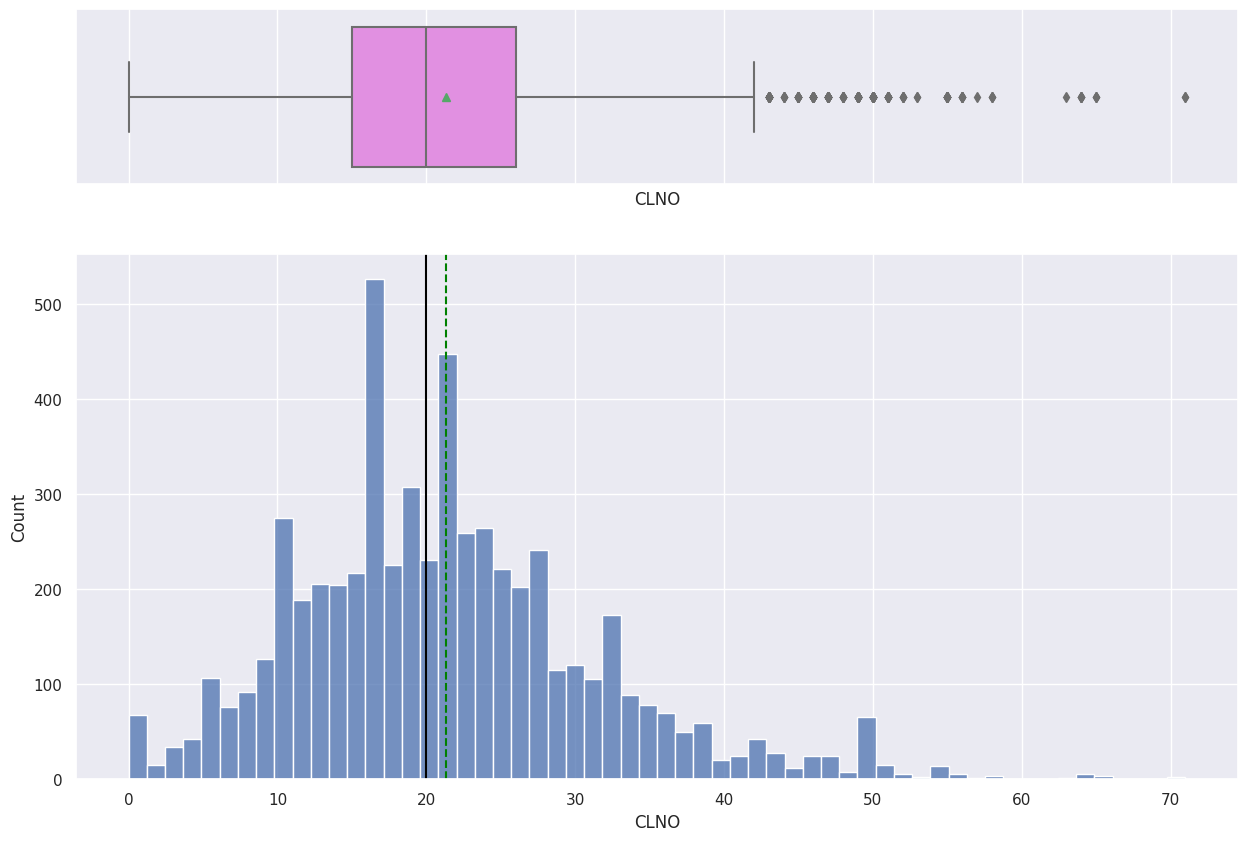

In [ ]:
histogram_boxplot(data,"CLNO")

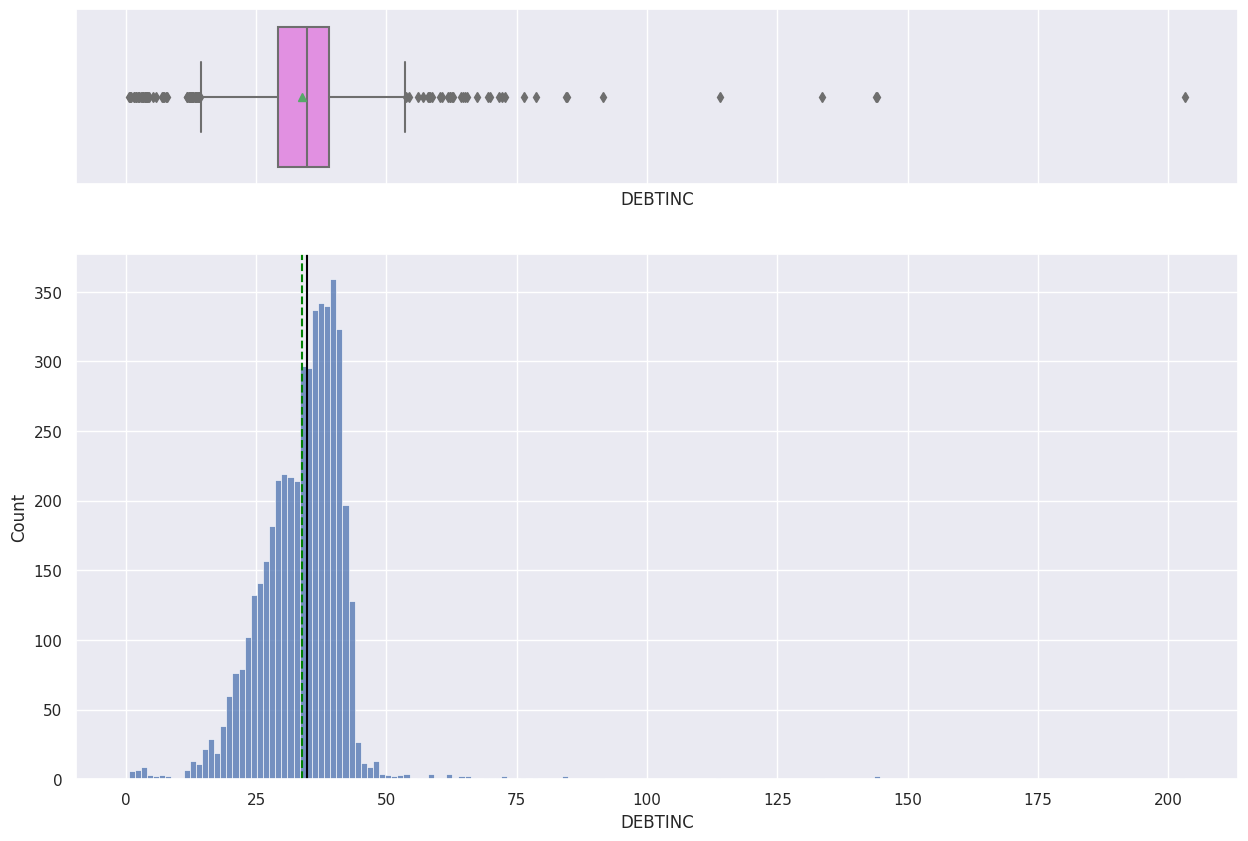

In [ ]:
histogram_boxplot(data,"DEBTINC")

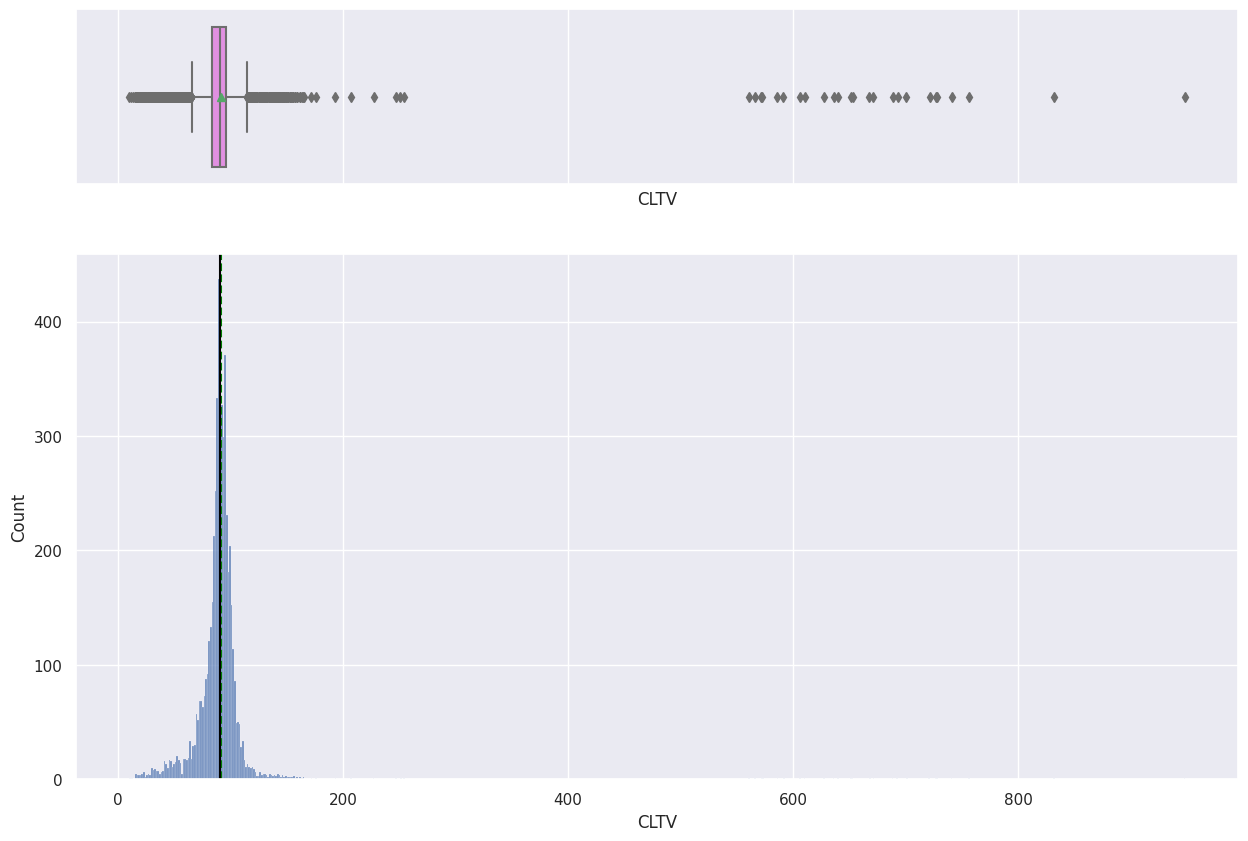

In [ ]:
histogram_boxplot(data,"CLTV")

**Insights ____________**

### **2. Univariate Analysis - Categorical Data**

In [ ]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage

    plt.show() # show the plot

#### Analyze Barplot for DELINQ

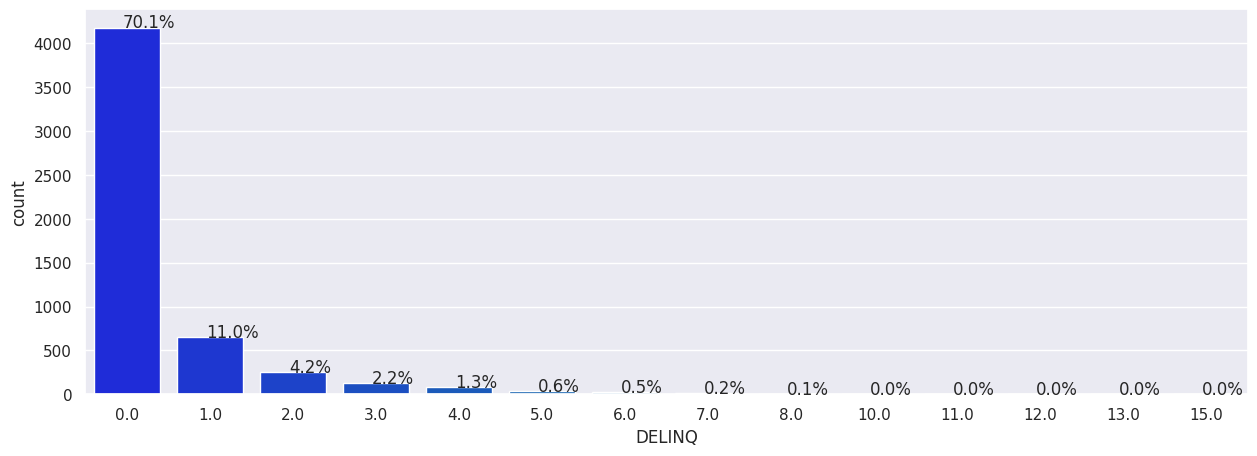

In [ ]:
#Build barplot for DELINQ

plt.figure(figsize=(15,5))
ax = sns.countplot(x=data["DELINQ"],palette='winter')
perc_on_bar(ax,data["DELINQ"])

#### **Note:** As done above, analyze Histogram and Boxplot for other variables.

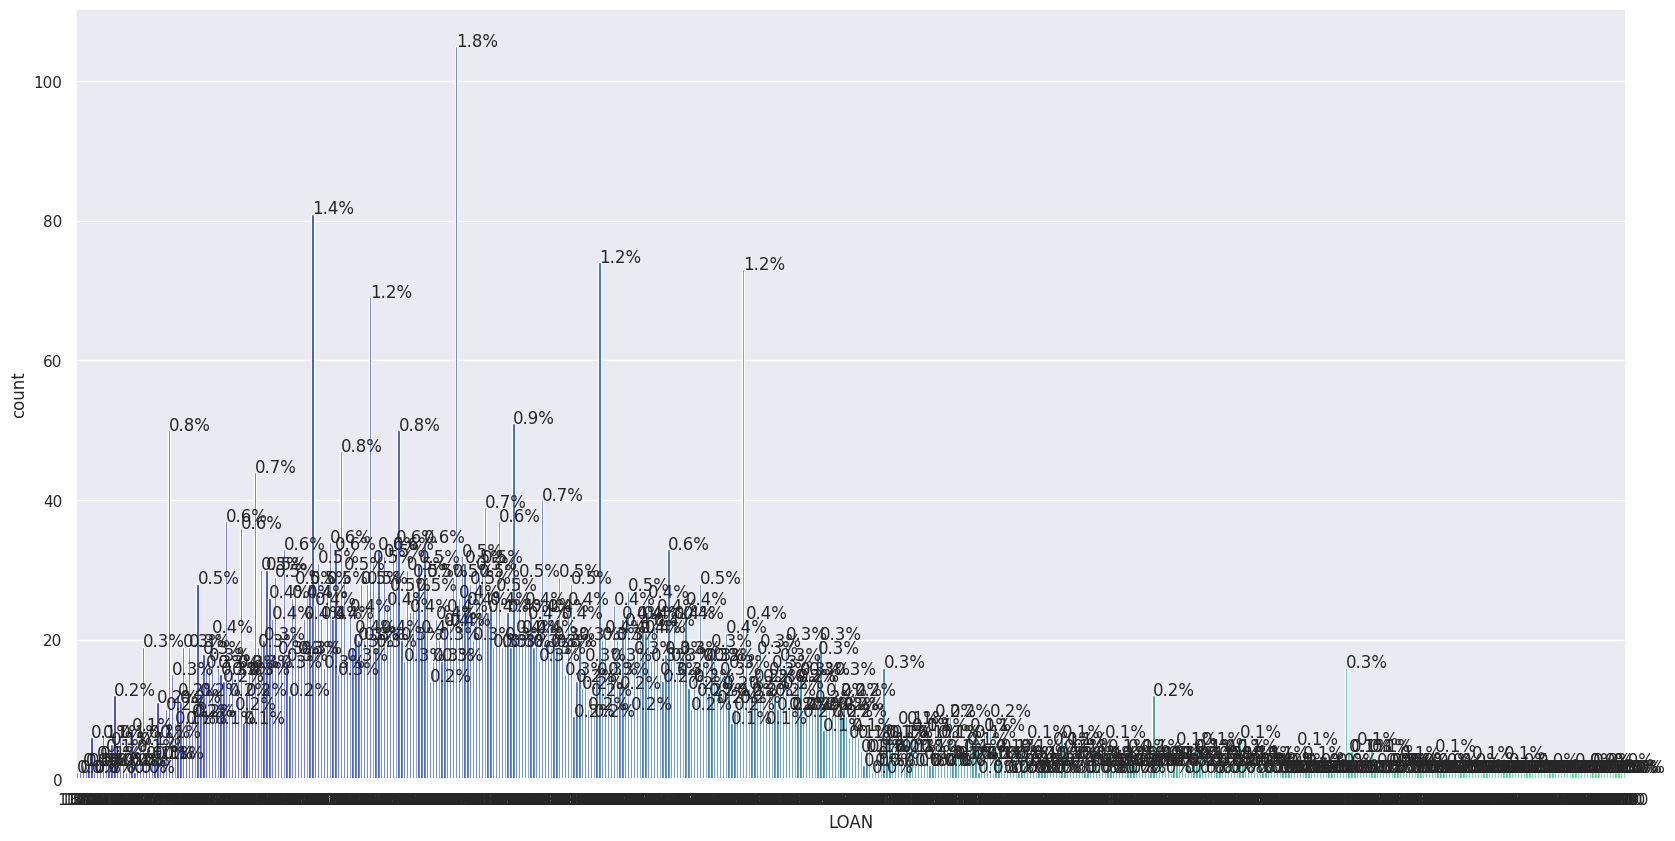

In [ ]:
#Build barplot for LOAN
plt.figure(figsize=(20,10))
ax = sns.countplot(x=data["LOAN"],palette='winter')
perc_on_bar(ax,data["LOAN"])

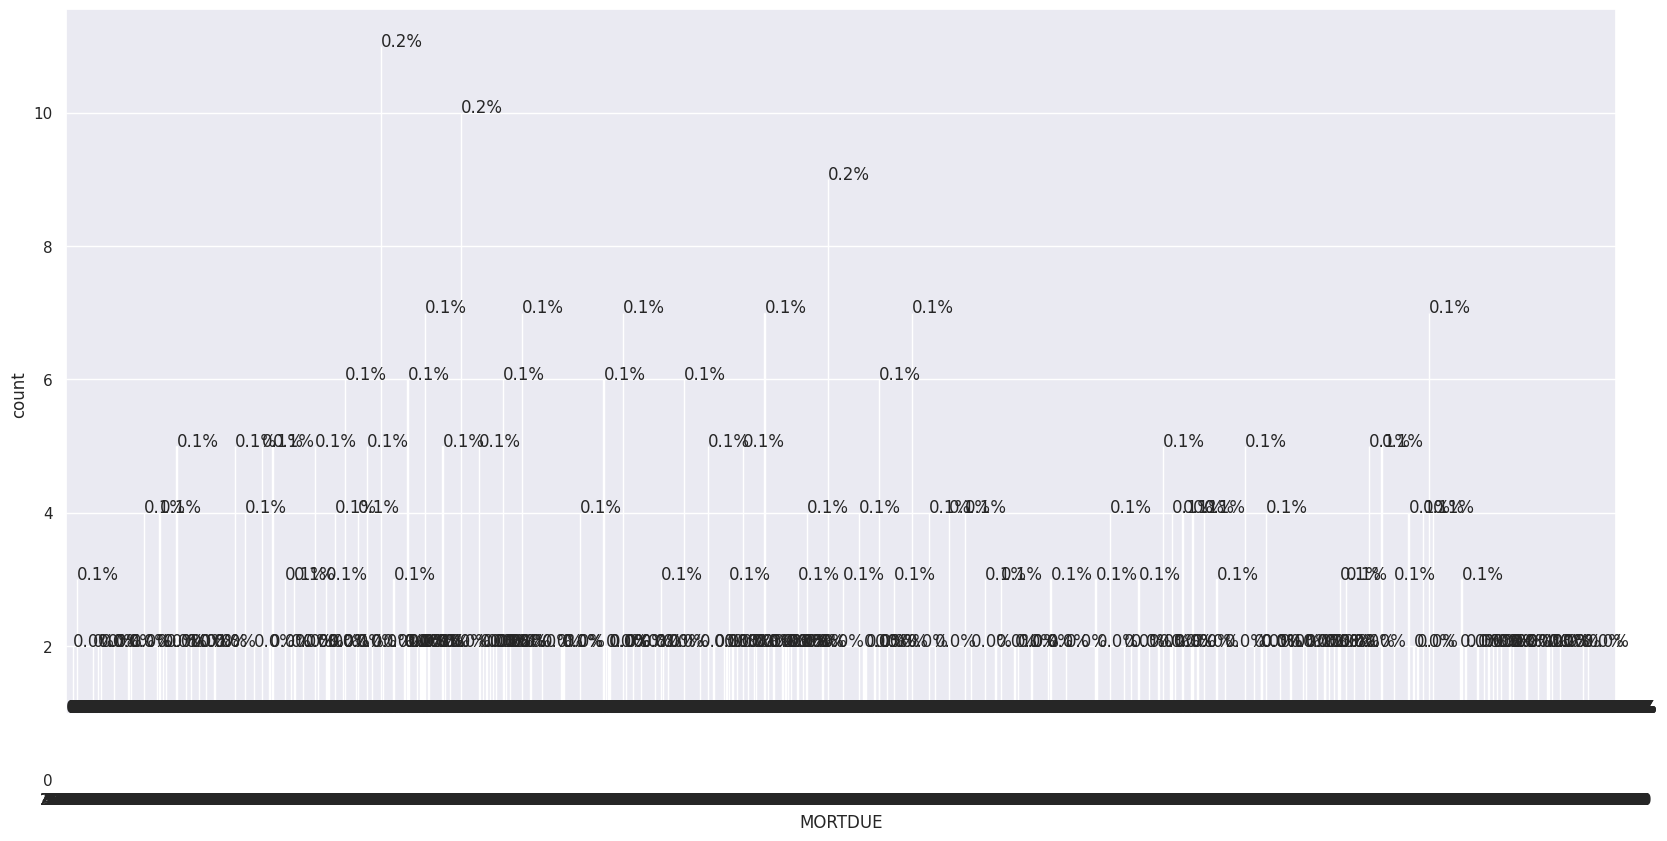

In [ ]:
#Build barplot for MORTDUE
plt.figure(figsize=(20,10))
ax = sns.countplot(x=data["MORTDUE"],palette='winter')
perc_on_bar(ax,data["MORTDUE"])

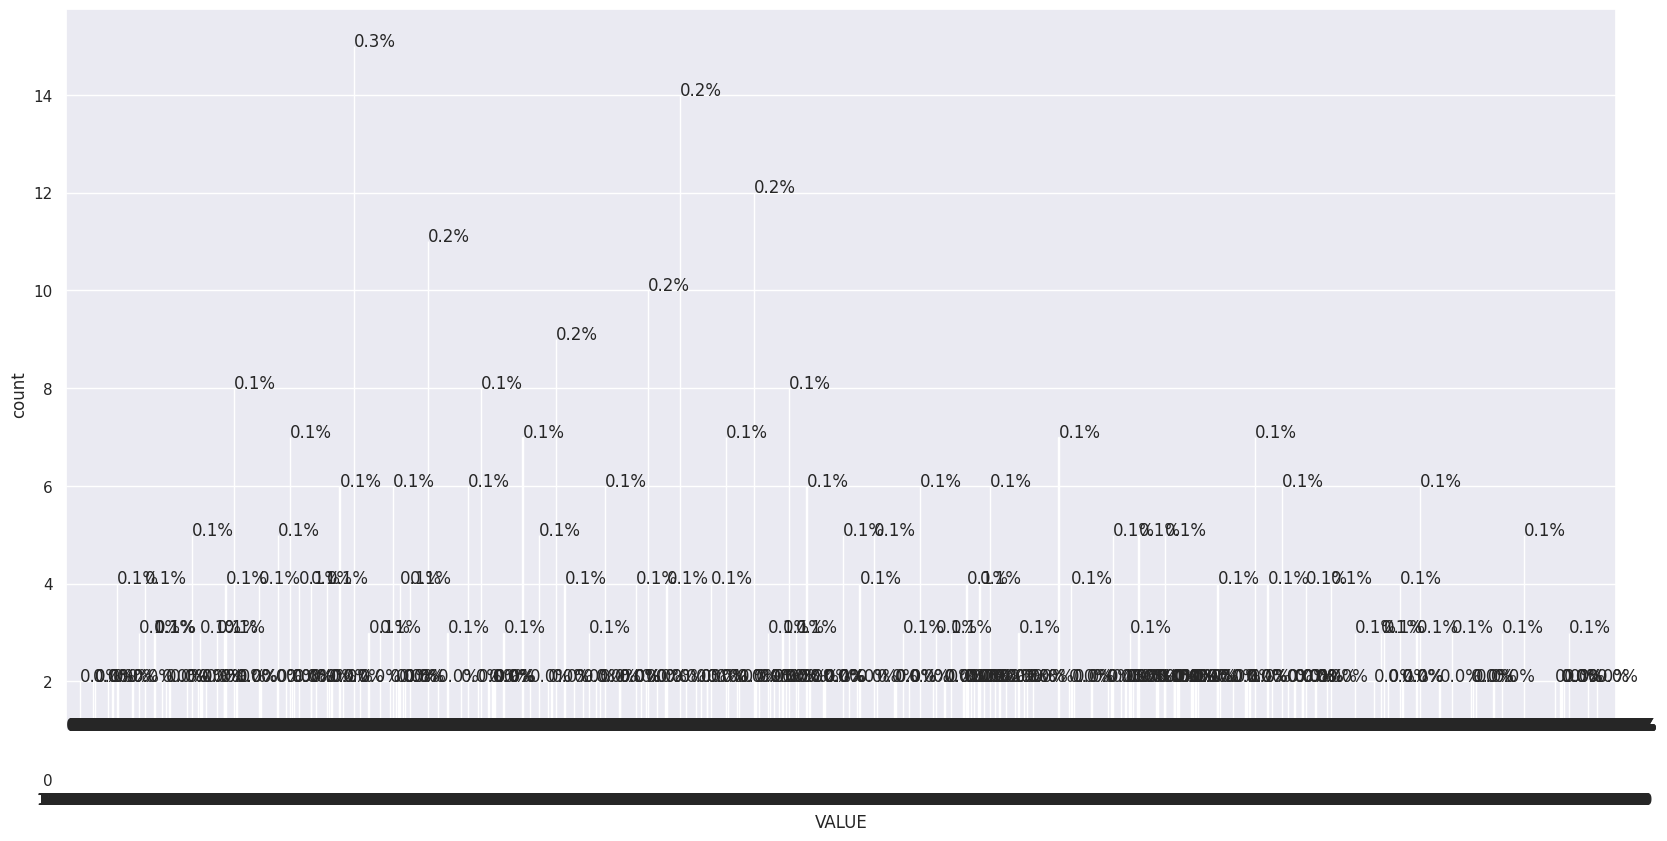

In [ ]:
#Build barplot for VALUE
plt.figure(figsize=(20,10))
ax = sns.countplot(x=data["VALUE"],palette='winter')
perc_on_bar(ax,data["VALUE"])

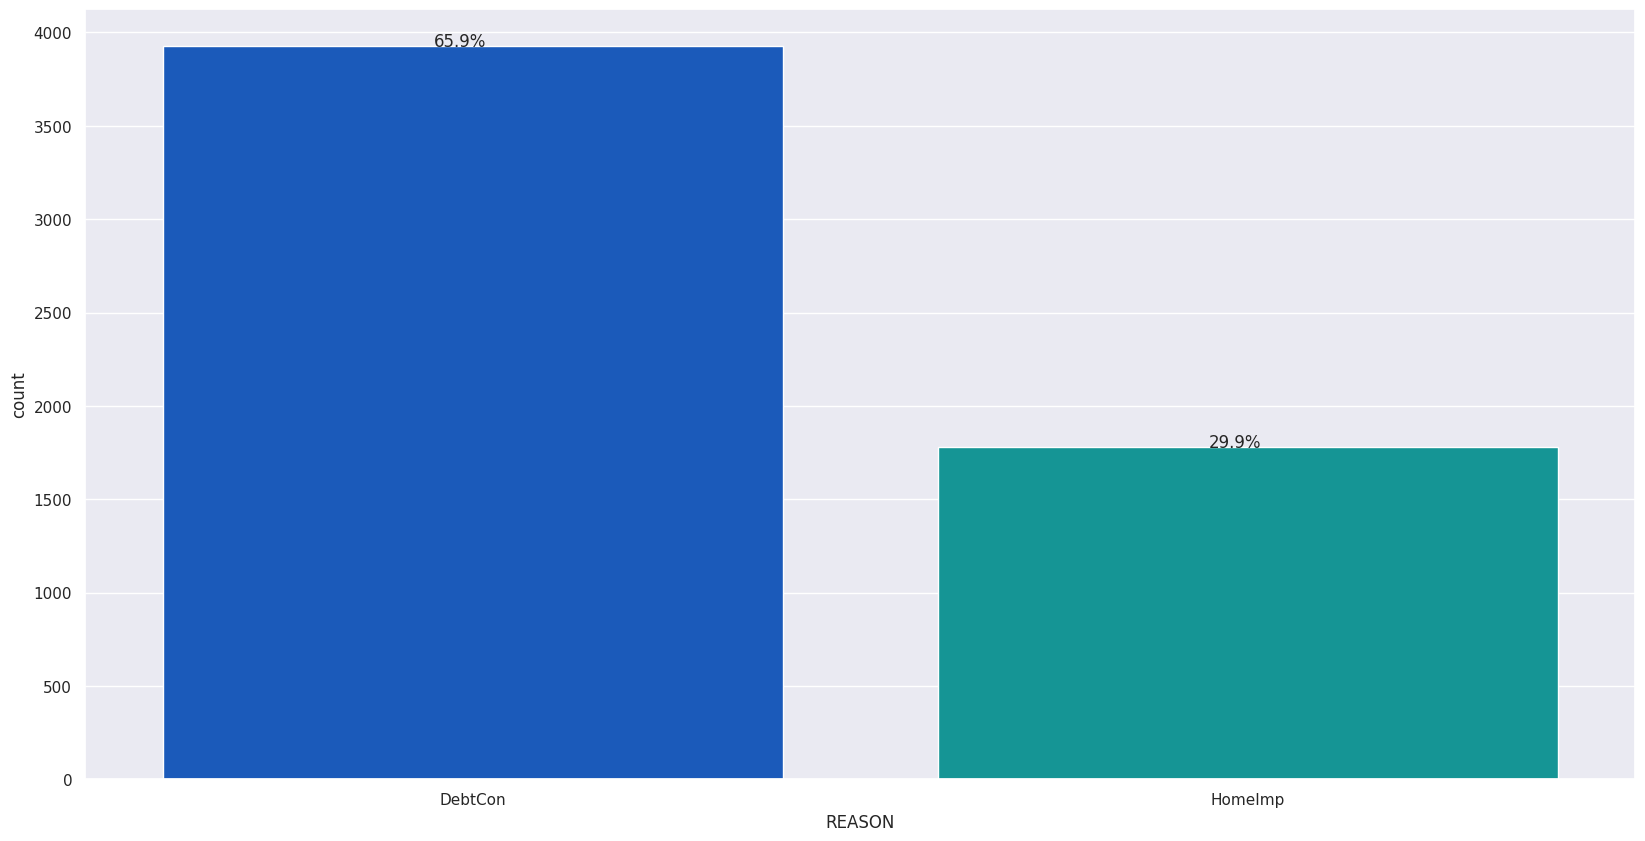

In [ ]:
#Build barplot for REASON
plt.figure(figsize=(20,10))
ax = sns.countplot(x=data["REASON"],palette='winter')
perc_on_bar(ax,data["REASON"])

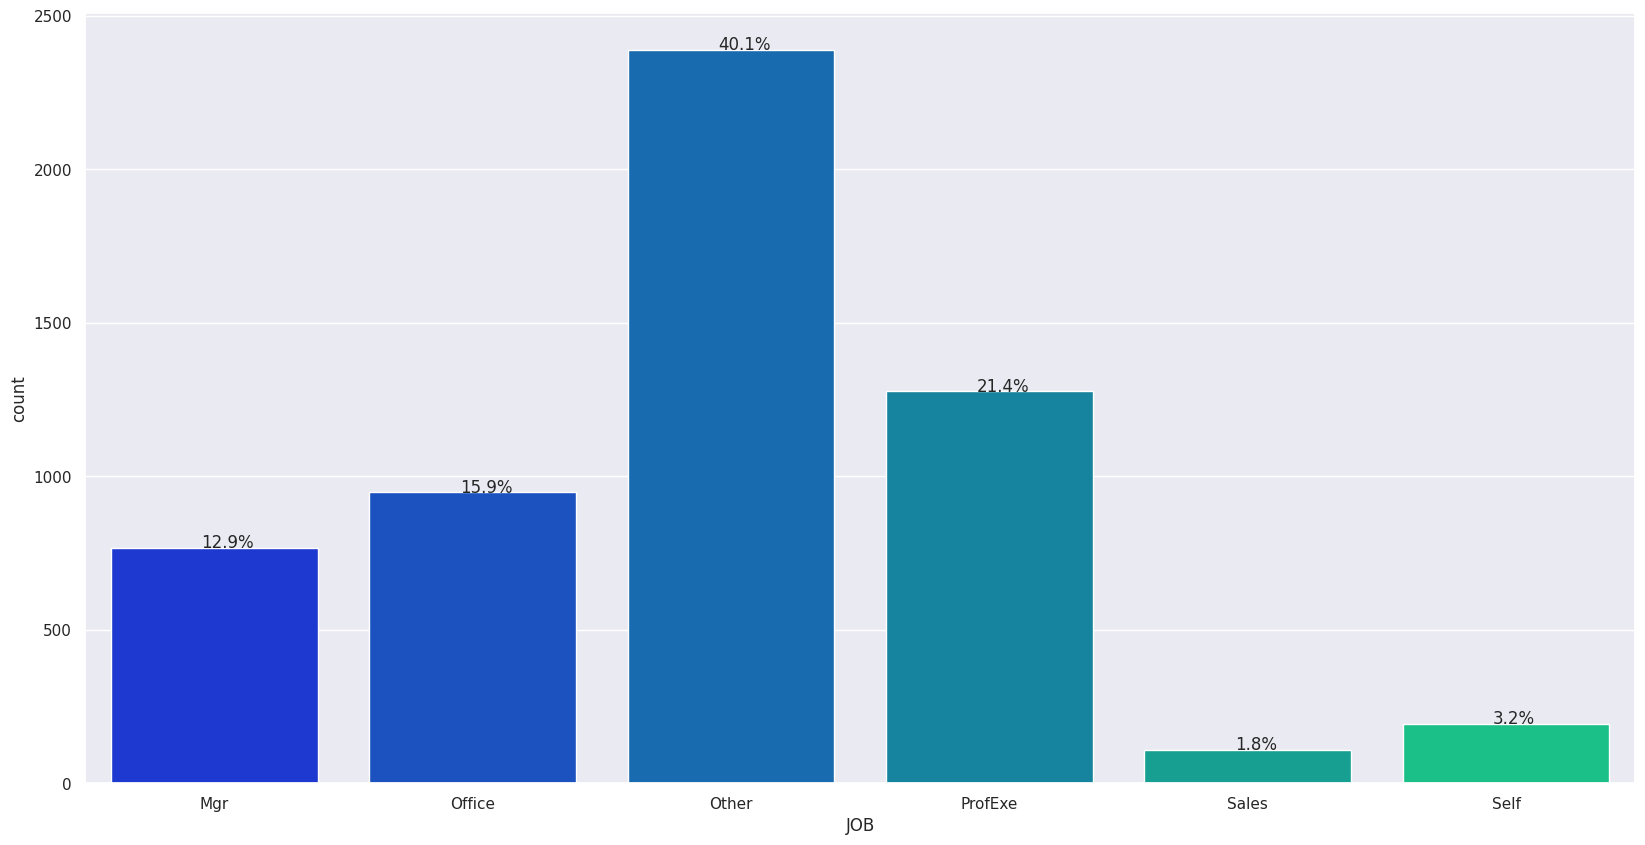

In [ ]:
#Build barplot for JOB
plt.figure(figsize=(20,10))
ax = sns.countplot(x=data["JOB"],palette='winter')
perc_on_bar(ax,data["JOB"])

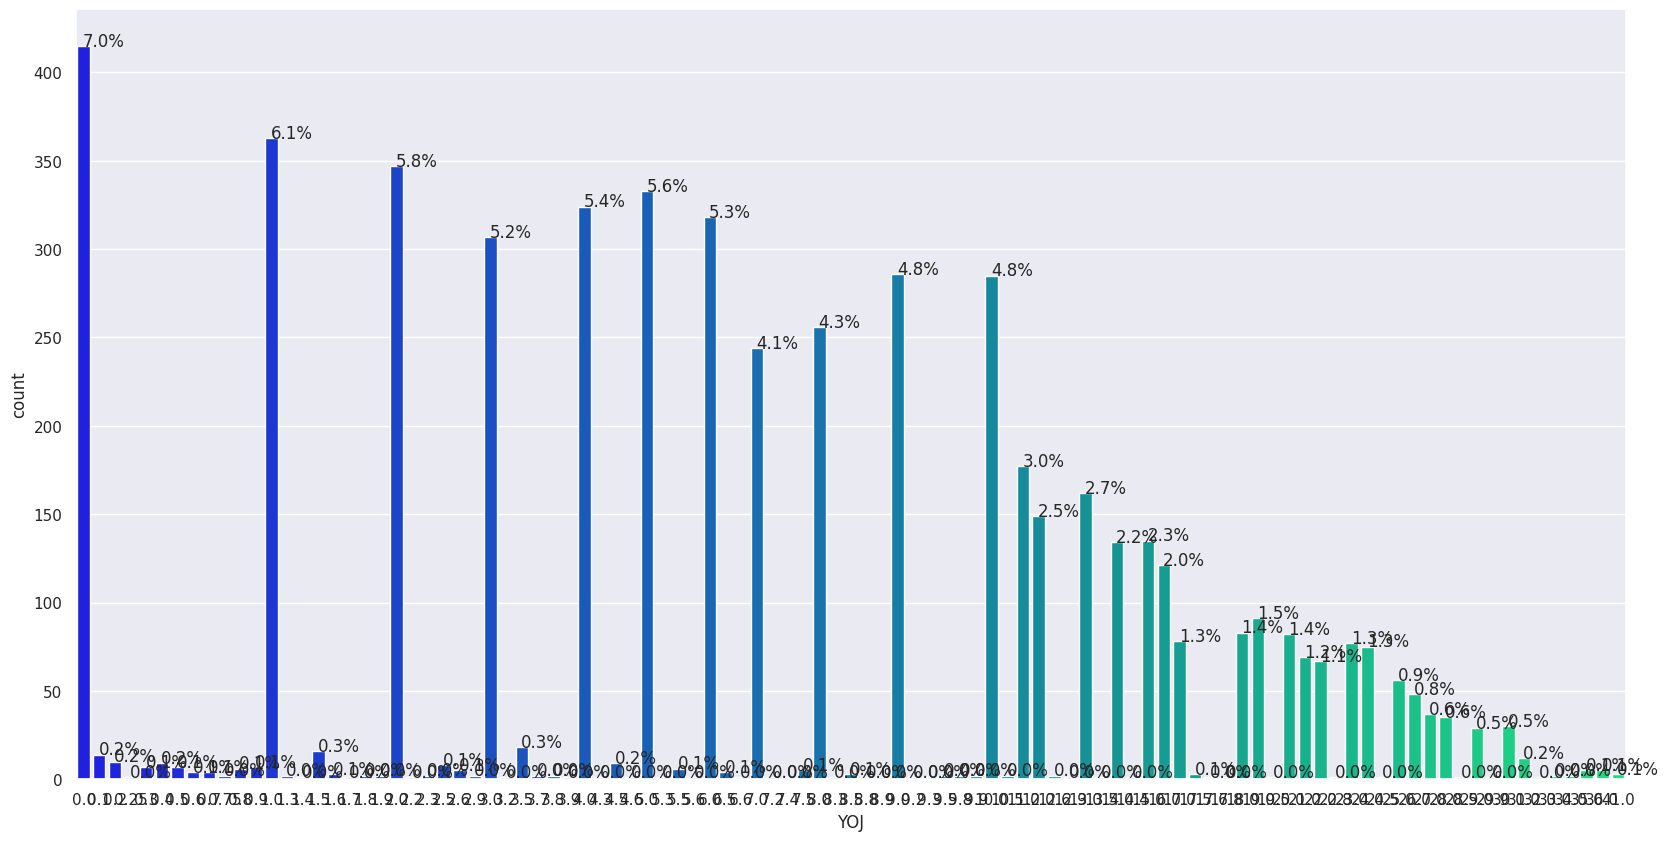

In [ ]:
#Build barplot for YOJ
plt.figure(figsize=(20,10))
ax = sns.countplot(x=data["YOJ"],palette='winter')
perc_on_bar(ax,data["YOJ"])

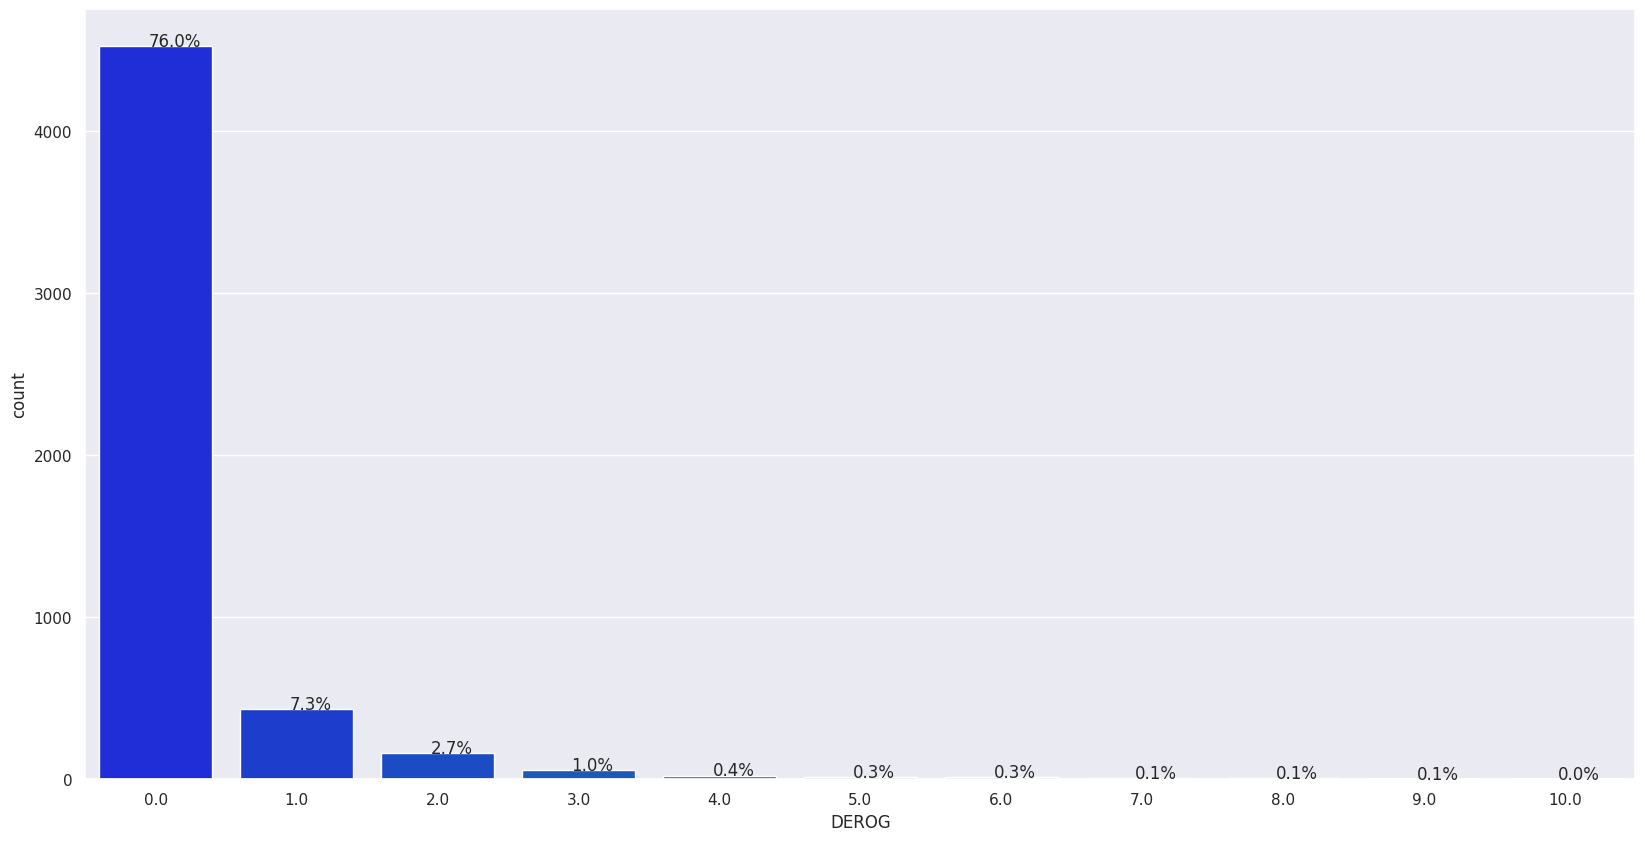

In [ ]:
#Build barplot for DEROG
plt.figure(figsize=(20,10))
ax = sns.countplot(x=data["DEROG"],palette='winter')
perc_on_bar(ax,data["DEROG"])

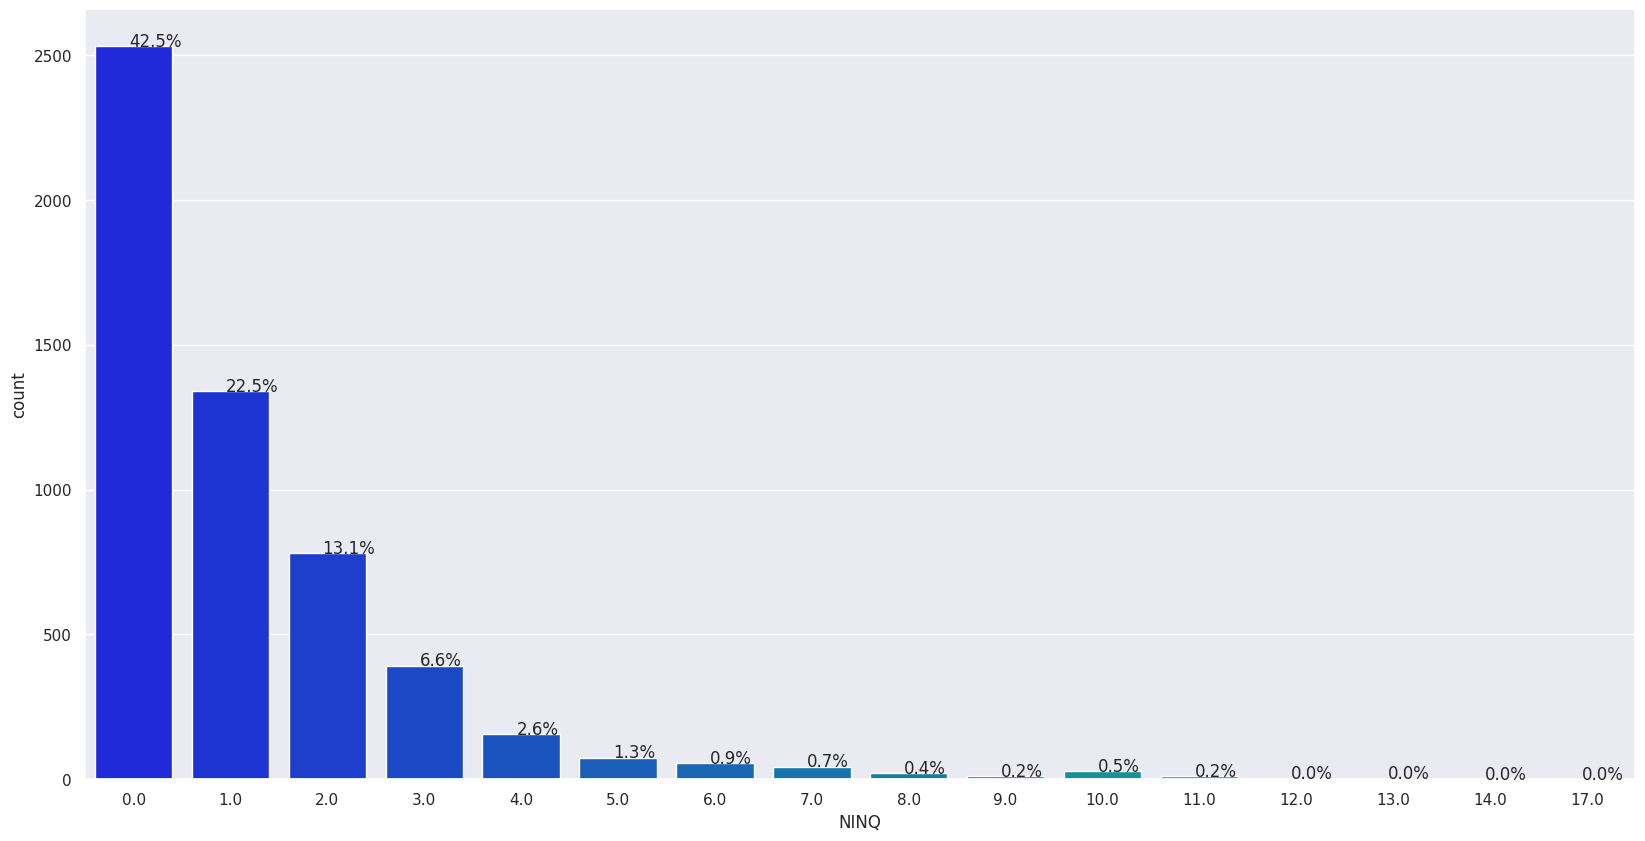

In [ ]:
#Build barplot for NINQ
plt.figure(figsize=(20,10))
ax = sns.countplot(x=data["NINQ"],palette='winter')
perc_on_bar(ax,data["NINQ"])

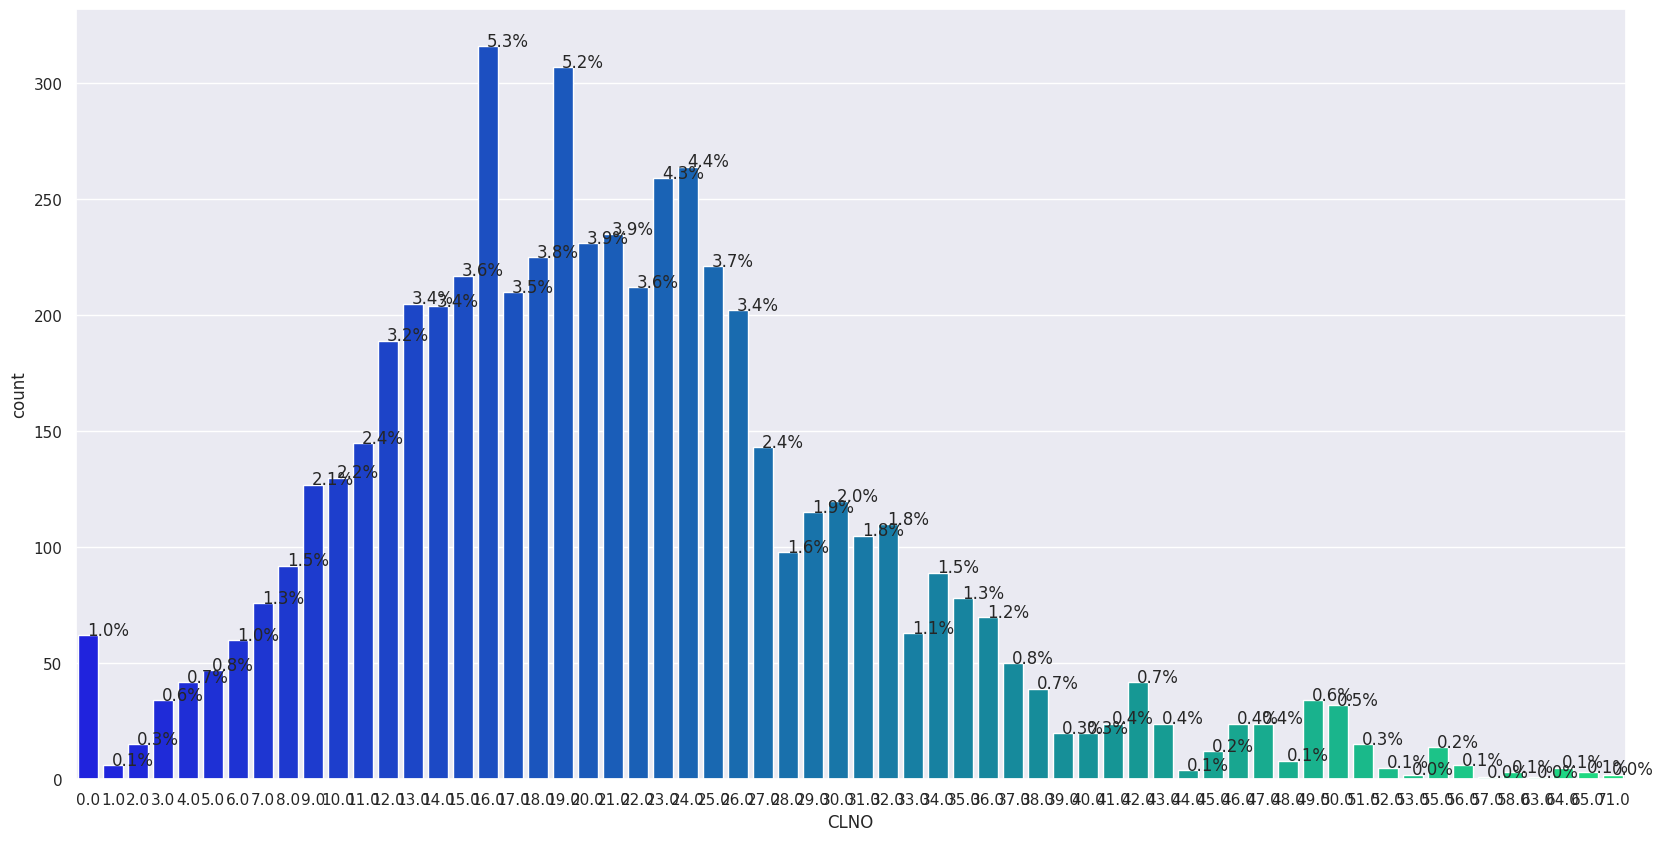

In [ ]:
#Build barplot for CLNO
plt.figure(figsize=(20,10))
ax = sns.countplot(x=data["CLNO"],palette='winter')
perc_on_bar(ax,data["CLNO"])

## **Bivariate Analysis**

### **Bivariate Analysis: Continuous and Categorical Variables**

#### Analyze BAD vs Loan

<Axes: xlabel='BAD', ylabel='LOAN'>

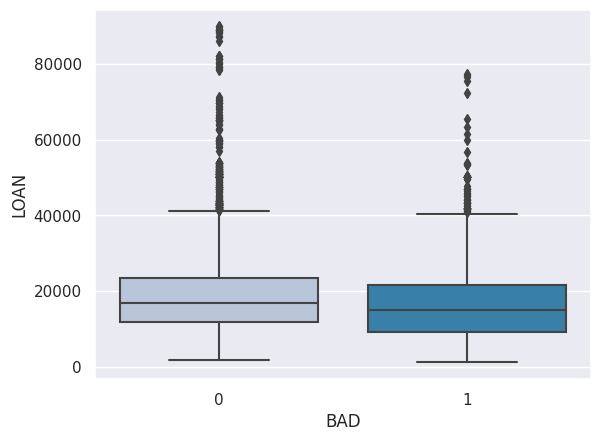

In [ ]:
sns.boxplot(x=data["BAD"],y=data['LOAN'],palette="PuBu")

**Insights ______**

#### **Note:** As shown above, perform Bi-Variate Analysis on different pair of Categorical and continuous variables

<Axes: xlabel='BAD', ylabel='MORTDUE'>

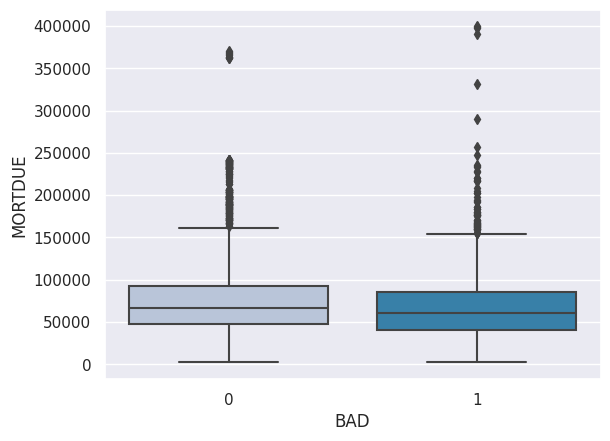

In [ ]:
sns.boxplot(x=data["BAD"],y=data['MORTDUE'],palette="PuBu")

<Axes: xlabel='BAD', ylabel='VALUE'>

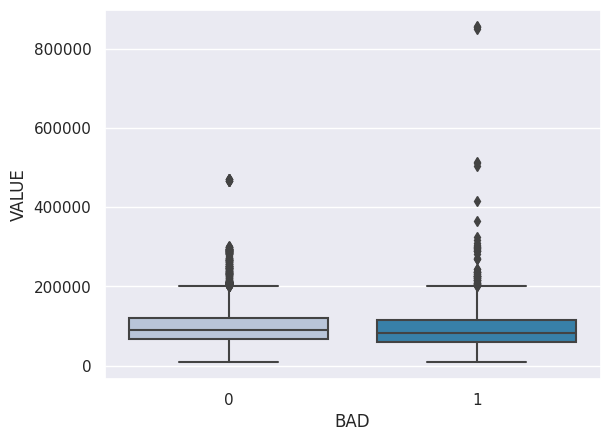

In [ ]:
sns.boxplot(x=data["BAD"],y=data['VALUE'],palette="PuBu")

<Axes: xlabel='BAD', ylabel='YOJ'>

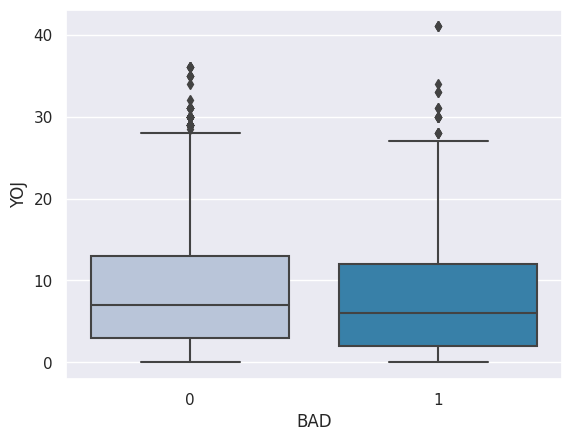

In [ ]:
sns.boxplot(x=data["BAD"],y=data["YOJ"],palette="PuBu")

<Axes: xlabel='BAD', ylabel='DEROG'>

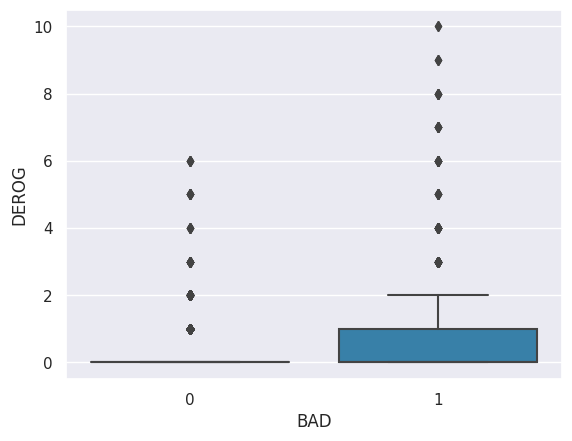

In [ ]:
sns.boxplot(x=data["BAD"],y=data['DEROG'],palette="PuBu")

<Axes: xlabel='BAD', ylabel='DELINQ'>

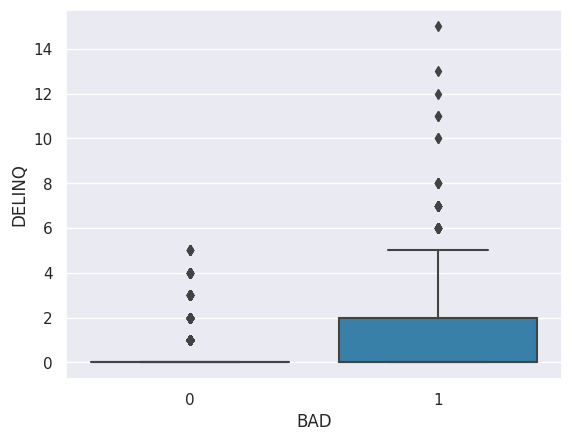

In [ ]:
sns.boxplot(x=data["BAD"],y=data['DELINQ'],palette="PuBu")

<Axes: xlabel='BAD', ylabel='CLAGE'>

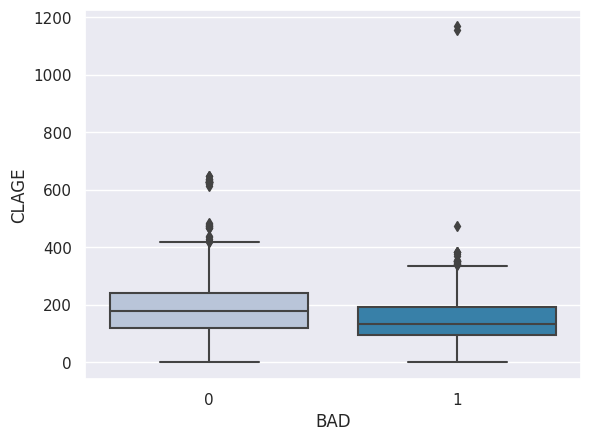

In [ ]:
sns.boxplot(x=data["BAD"],y=data['CLAGE'],palette="PuBu")

<Axes: xlabel='BAD', ylabel='NINQ'>

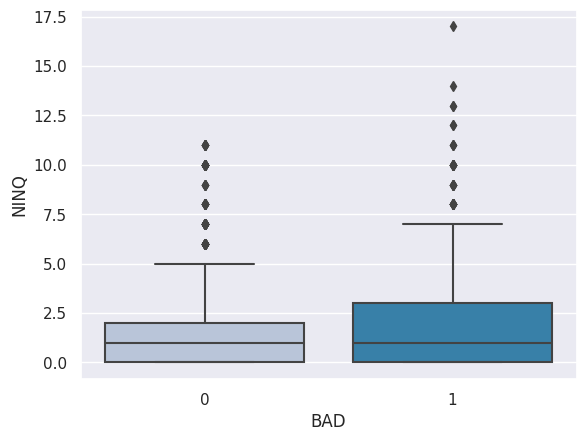

In [ ]:
sns.boxplot(x=data["BAD"],y=data['NINQ'],palette="PuBu")

<Axes: xlabel='BAD', ylabel='CLNO'>

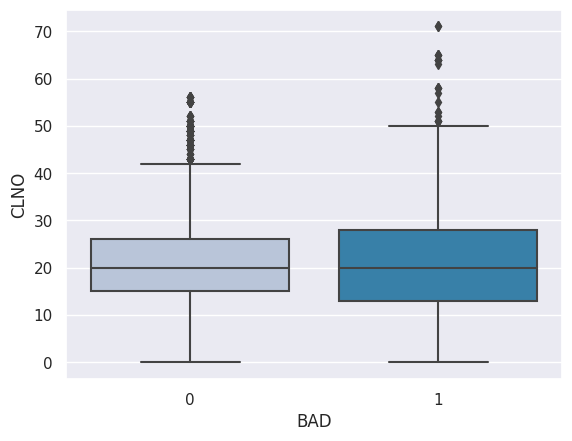

In [ ]:
sns.boxplot(x=data["BAD"],y=data['CLNO'],palette="PuBu")

<Axes: xlabel='BAD', ylabel='DEBTINC'>

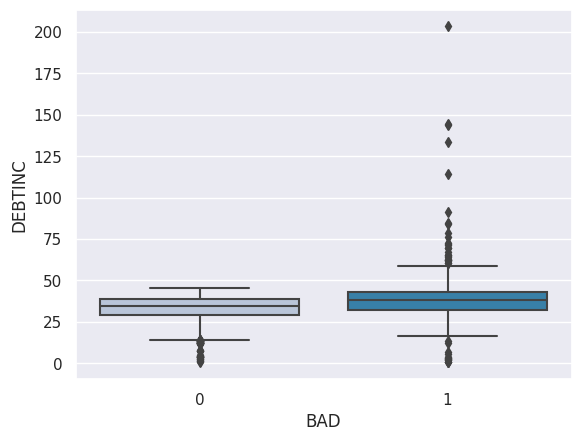

In [ ]:
sns.boxplot(x=data["BAD"],y=data['DEBTINC'],palette="PuBu")

<Axes: xlabel='BAD', ylabel='CLTV'>

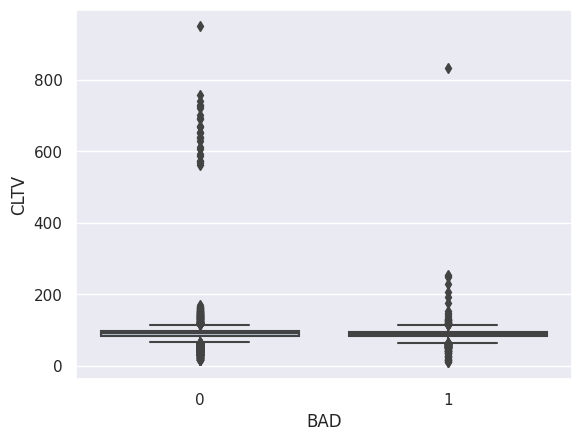

In [ ]:
sns.boxplot(x=data["BAD"],y=data['CLTV'],palette="PuBu")

### **Bivariate Analysis: Two Continuous Variables**

<Axes: xlabel='VALUE', ylabel='MORTDUE'>

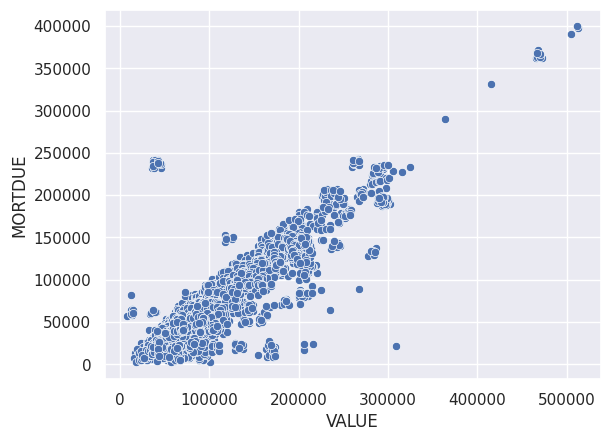

In [ ]:
sns.scatterplot(x=data["VALUE"],y=data['MORTDUE'],palette="PuBu")

<Axes: xlabel='BAD', ylabel='CLTV'>

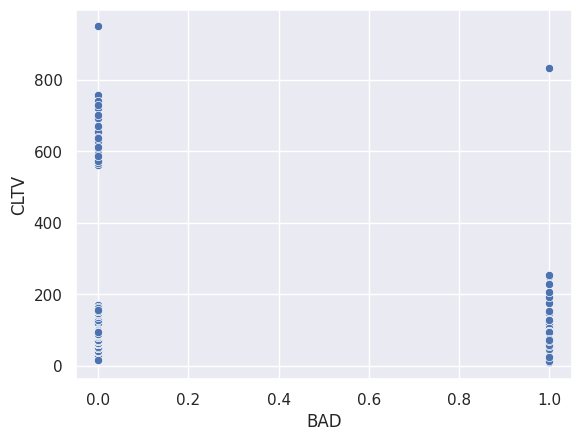

In [ ]:
sns.scatterplot(x=data["BAD"],y=data['CLTV'],palette="PuBu")

<Axes: xlabel='BAD', ylabel='DEBTINC'>

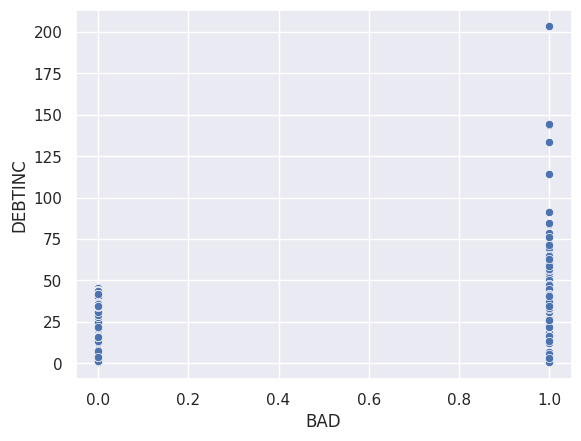

In [ ]:
sns.scatterplot(x=data["BAD"],y=data['DEBTINC'],palette="PuBu")

#### **Note:** As shown above, perform Bivariate Analysis on different pairs of continuous variables

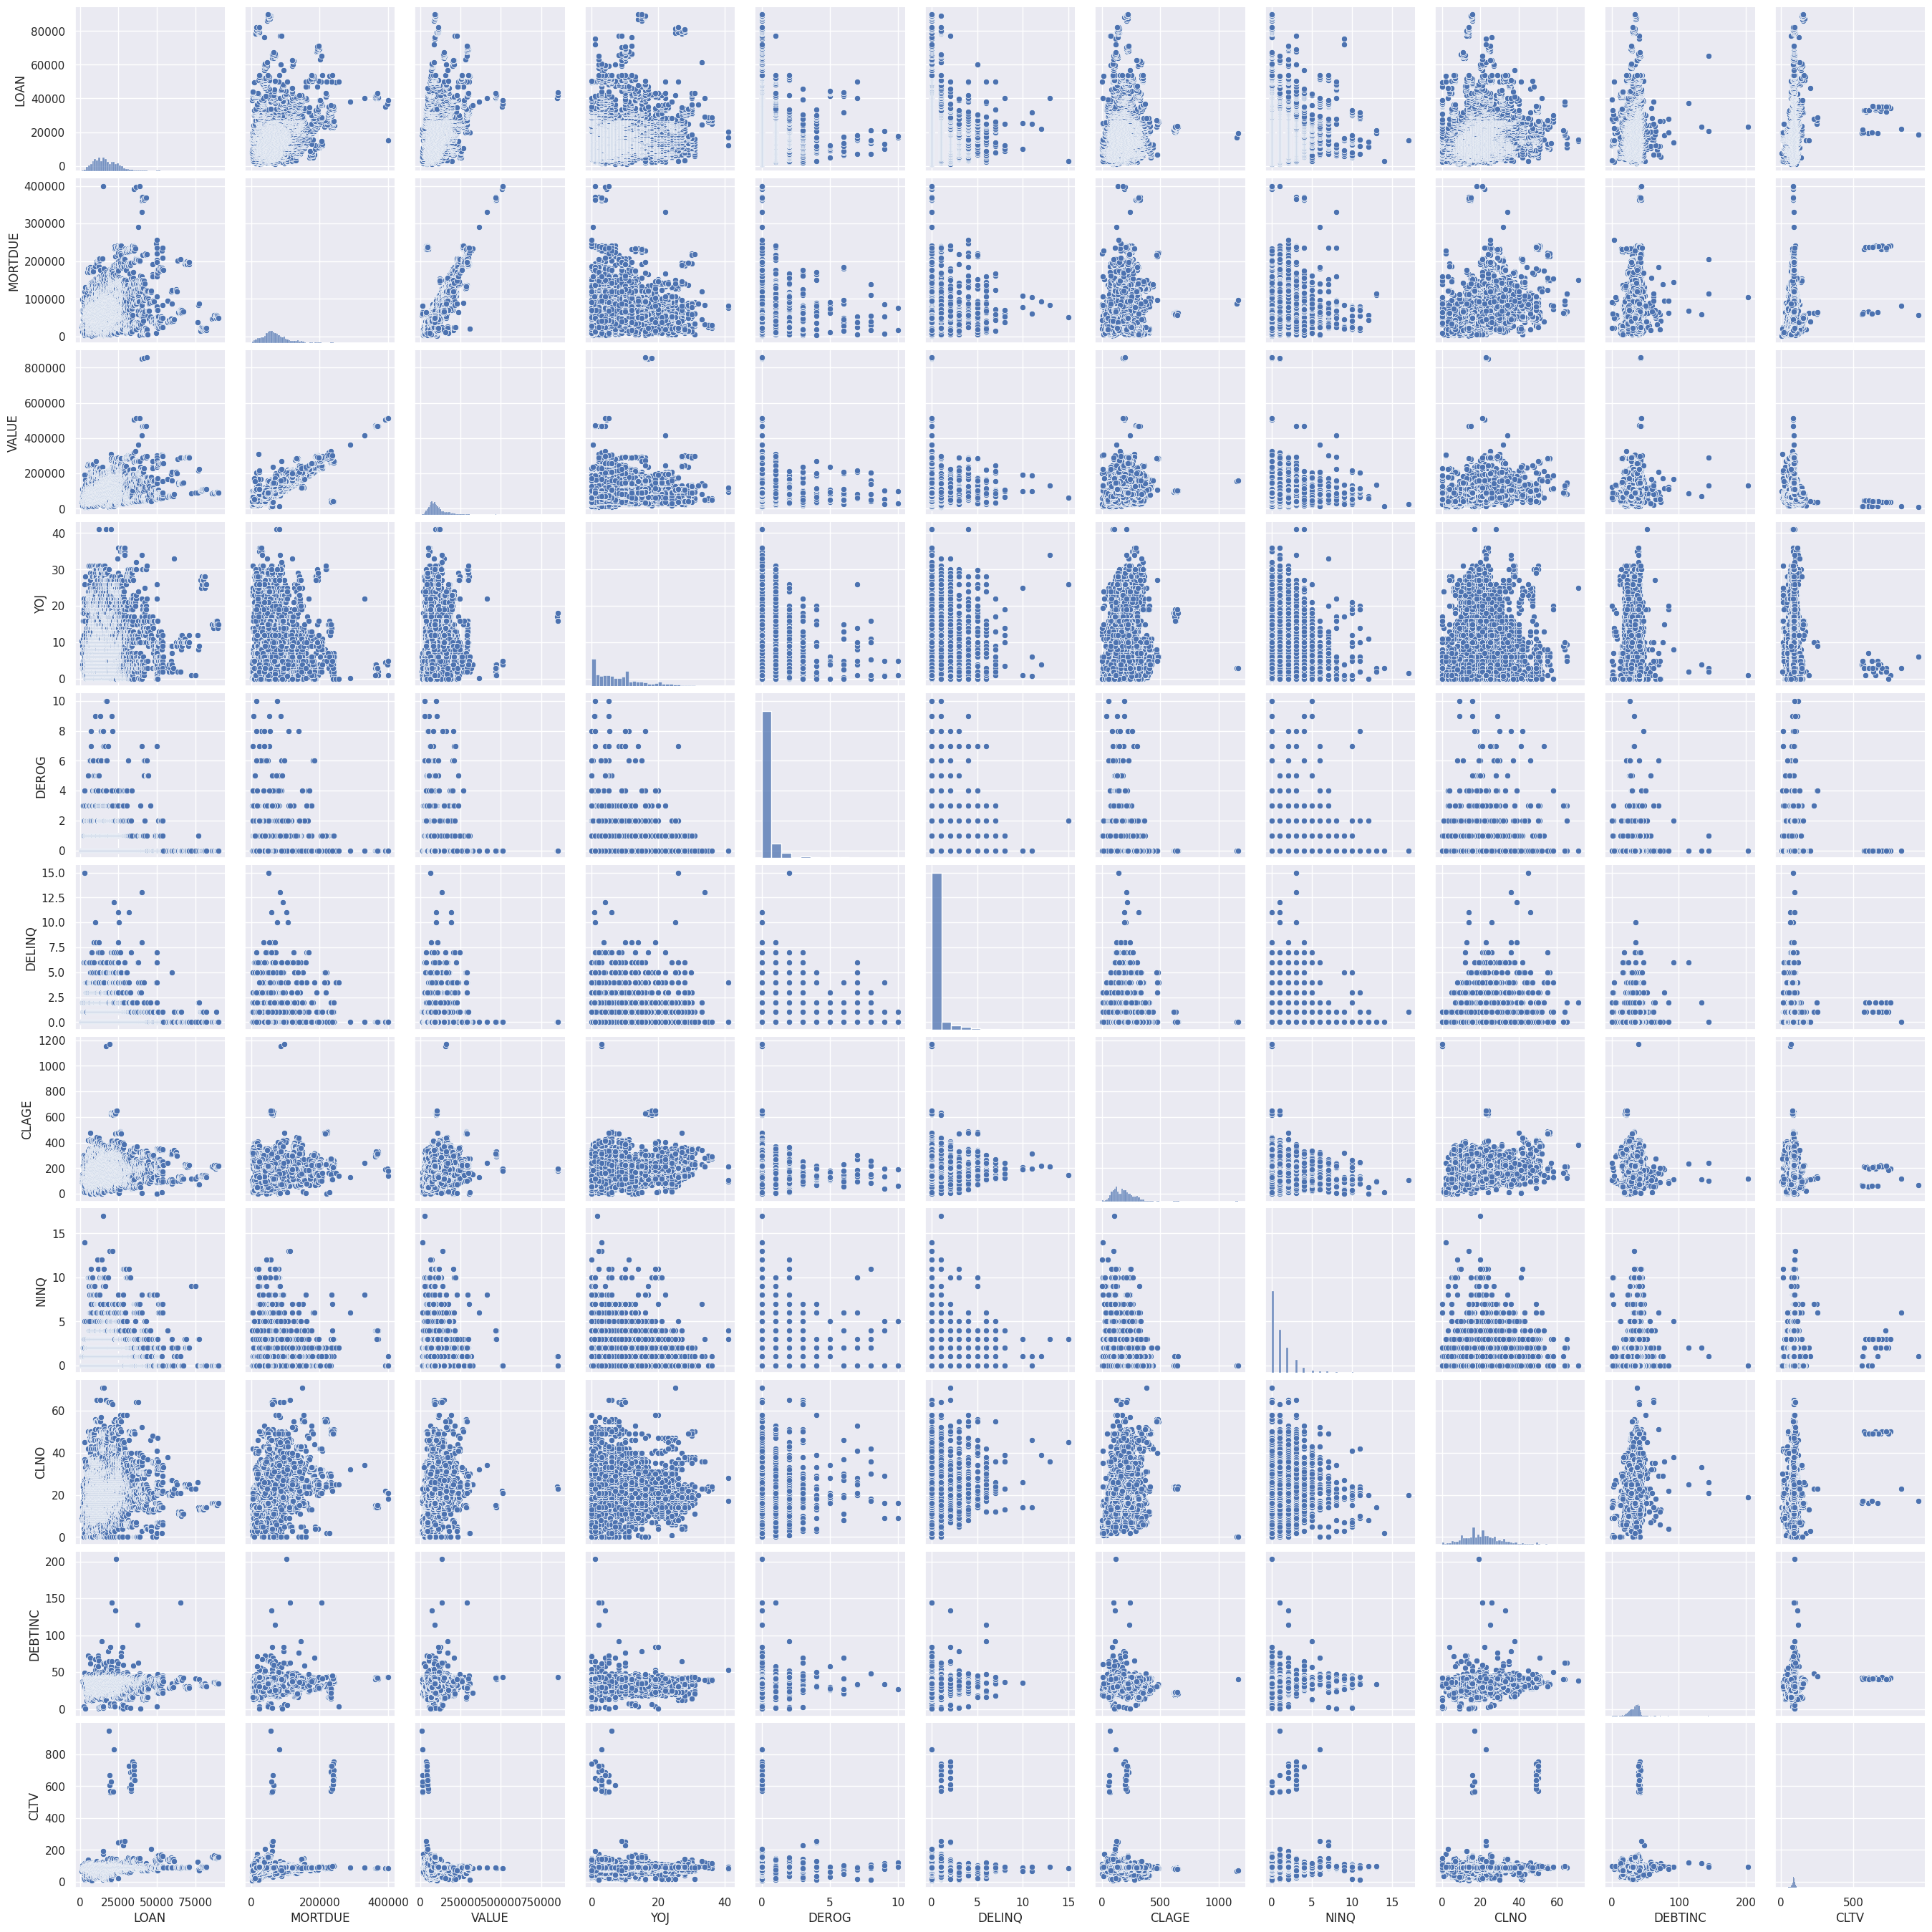

In [ ]:
# Perform scatter plot bivariate analysis for all continuous variables
sns.pairplot(data)

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()



In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()


REASON  DebtCon  HomeImp   All
BAD                           
All        3928     1780  5708
0          3183     1384  4567
1           745      396  1141
------------------------------------------------------------------------------------------------------------------------


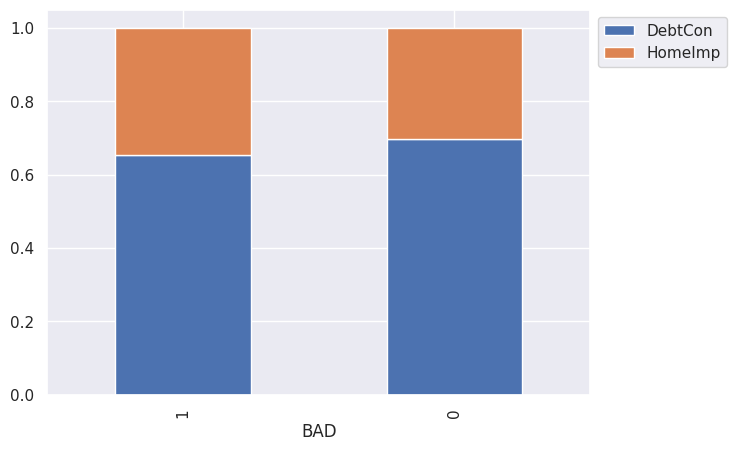

In [ ]:
stacked_barplot(data, 'BAD', 'REASON')

JOB  Mgr  Office  Other  ProfExe  Sales  Self   All
BAD                                                
All  767     948   2388     1276    109   193  5681
0    588     823   1834     1064     71   135  4515
1    179     125    554      212     38    58  1166
------------------------------------------------------------------------------------------------------------------------


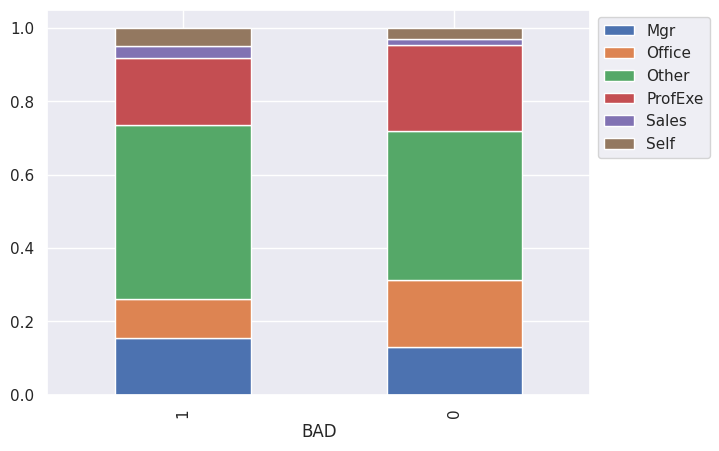

In [ ]:
stacked_barplot(data, 'BAD','JOB')

LOAN  1100  1300  1500  1700  1800  2000  2100  2200  2300  2400  ...  87500  \
BAD                                                               ...          
0        0     0     0     1     0     1     0     0     1     1  ...      1   
All      1     1     2     2     2     6     1     3     3     6  ...      1   
1        1     1     2     1     2     5     1     3     2     5  ...      0   

LOAN  88300  88500  88800  88900  89000  89200  89800  89900   All  
BAD                                                                 
0         1      1      1      2      1      1      1      1  4771  
All       1      1      1      2      1      1      1      1  5960  
1         0      0      0      0      0      0      0      0  1189  

[3 rows x 541 columns]
------------------------------------------------------------------------------------------------------------------------


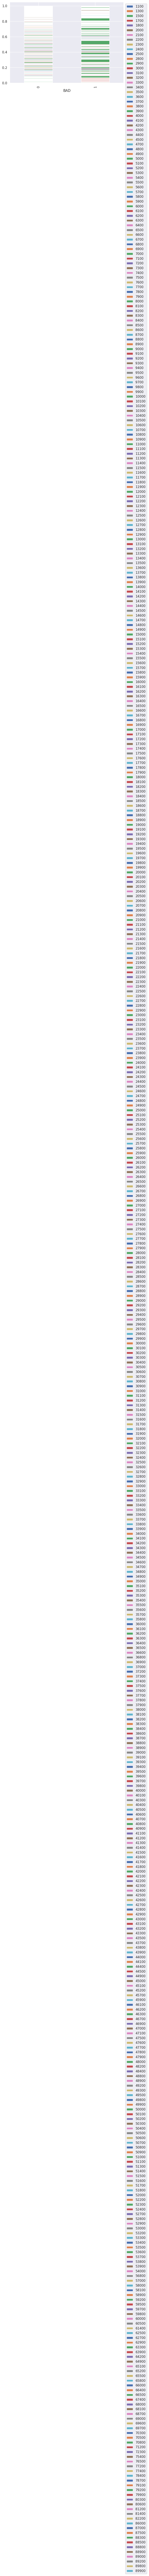

In [ ]:
stacked_barplot(data, 'BAD', 'LOAN')

### **Bivariate Analysis:  BAD vs Categorical Variables**

**The stacked bar chart (aka stacked bar graph)** extends the standard bar chart from looking at numeric values across one categorical variable to two.

In [ ]:
### Function to plot stacked bar charts for categorical columns

def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['BAD'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['BAD'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

#### Plot stacked bar plot for for LOAN and REASON

In [ ]:
print(396/1780)
print(793/4180)

0.22247191011235956
0.18971291866028708


BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
------------------------------------------------------------------------------------------------------------------------


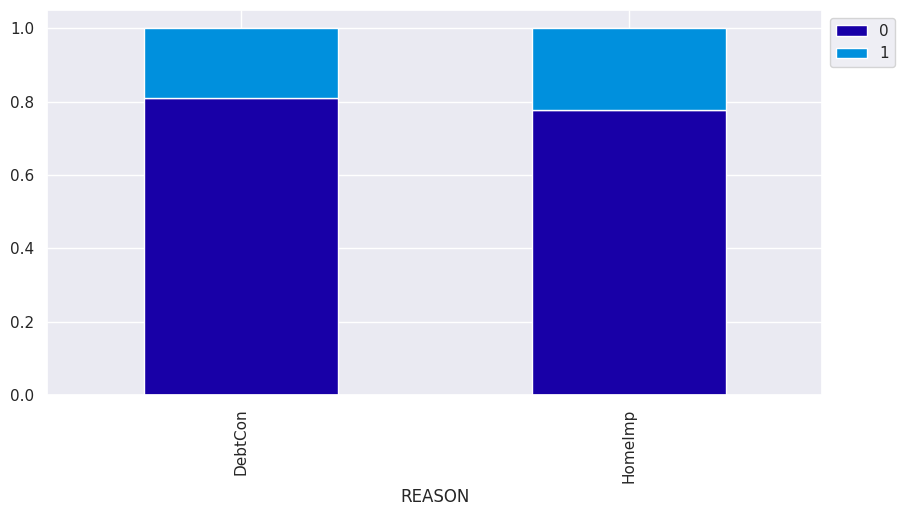

In [ ]:
# Plot stacked bar plot for BAD and REASON
stacked_plot(data['REASON'])

#### **Note:** As shown above, perform Bivariate Analysis on different pairs of Categorical vs BAD

In [ ]:
#show data
data.head()

BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0   1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1   1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2   1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3   1  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4   0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO  DEBTINC        CLTV  
0   94.366667   1.0   9.0      NaN   69.083921  
1  121.833333   0.0  14.0      NaN  104.317251  
2  149.466667   1.0  10.0      NaN   89.820359  
3         NaN   NaN   NaN      NaN         NaN  
4   93.333333   0.0  14.0      NaN   88.839286

BAD         0     1   All
JOB                      
Mgr       588   179   767
Office    823   125   948
Other    1834   554  2388
ProfExe  1064   212  1276
Sales      71    38   109
Self      135    58   193
All      4515  1166  5681
------------------------------------------------------------------------------------------------------------------------


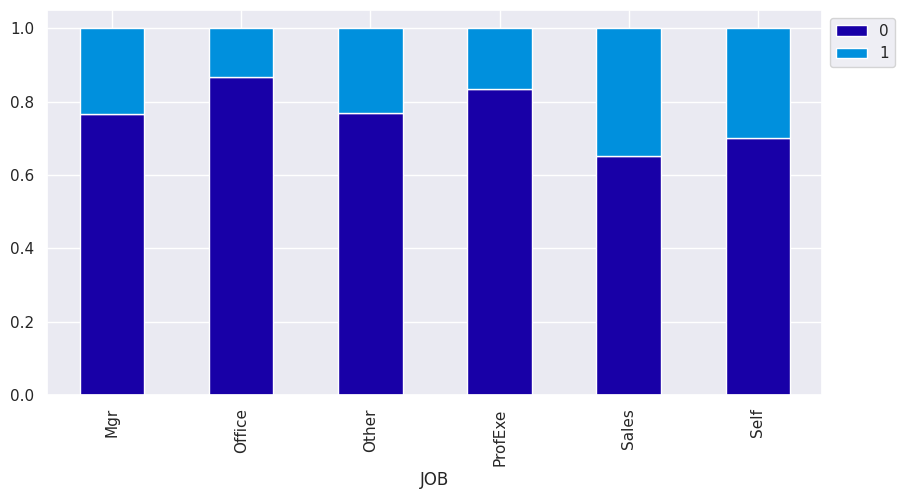

In [ ]:
# Plot stacked bar plot for BAD and REASON
stacked_plot(data['JOB'])

### **Multivariate Analysis**

#### Analyze Correlation Heatmap for Numerical Variables

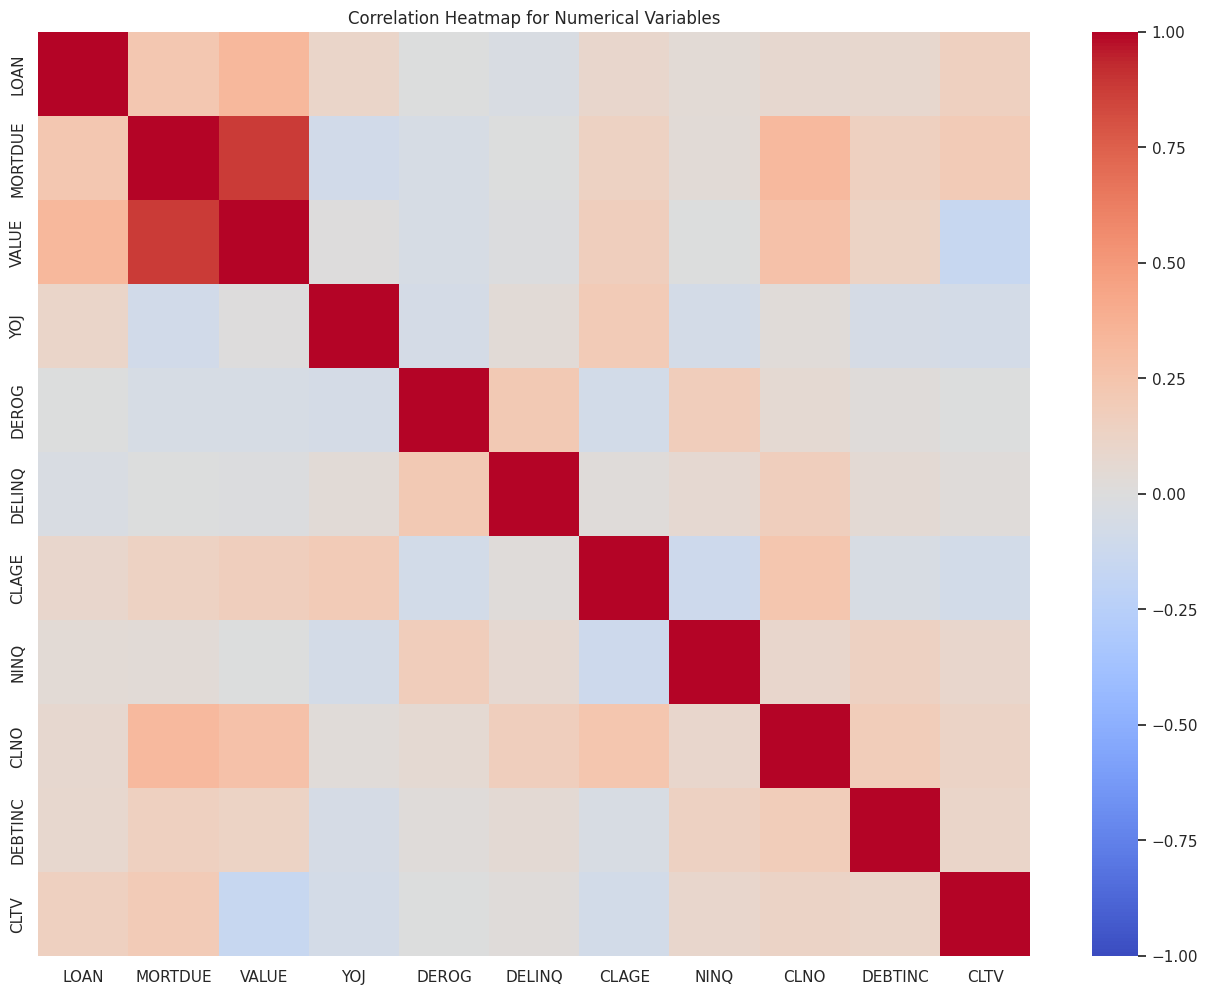

In [ ]:
# Separating numerical variables
numerical_col = data.select_dtypes(include=np.number).columns.tolist()

# Build correlation matrix for numerical columns

corr = data[numerical_col].corr()

# plot the heatmap

plt.figure(figsize=(16,12))
sns.heatmap(corr,cmap='coolwarm',vmax=1,vmin=-1,
        fmt=".2f",
        xticklabels=corr.columns,
        yticklabels=corr.columns);
plt.title("Correlation Heatmap for Numerical Variables")
plt.show()

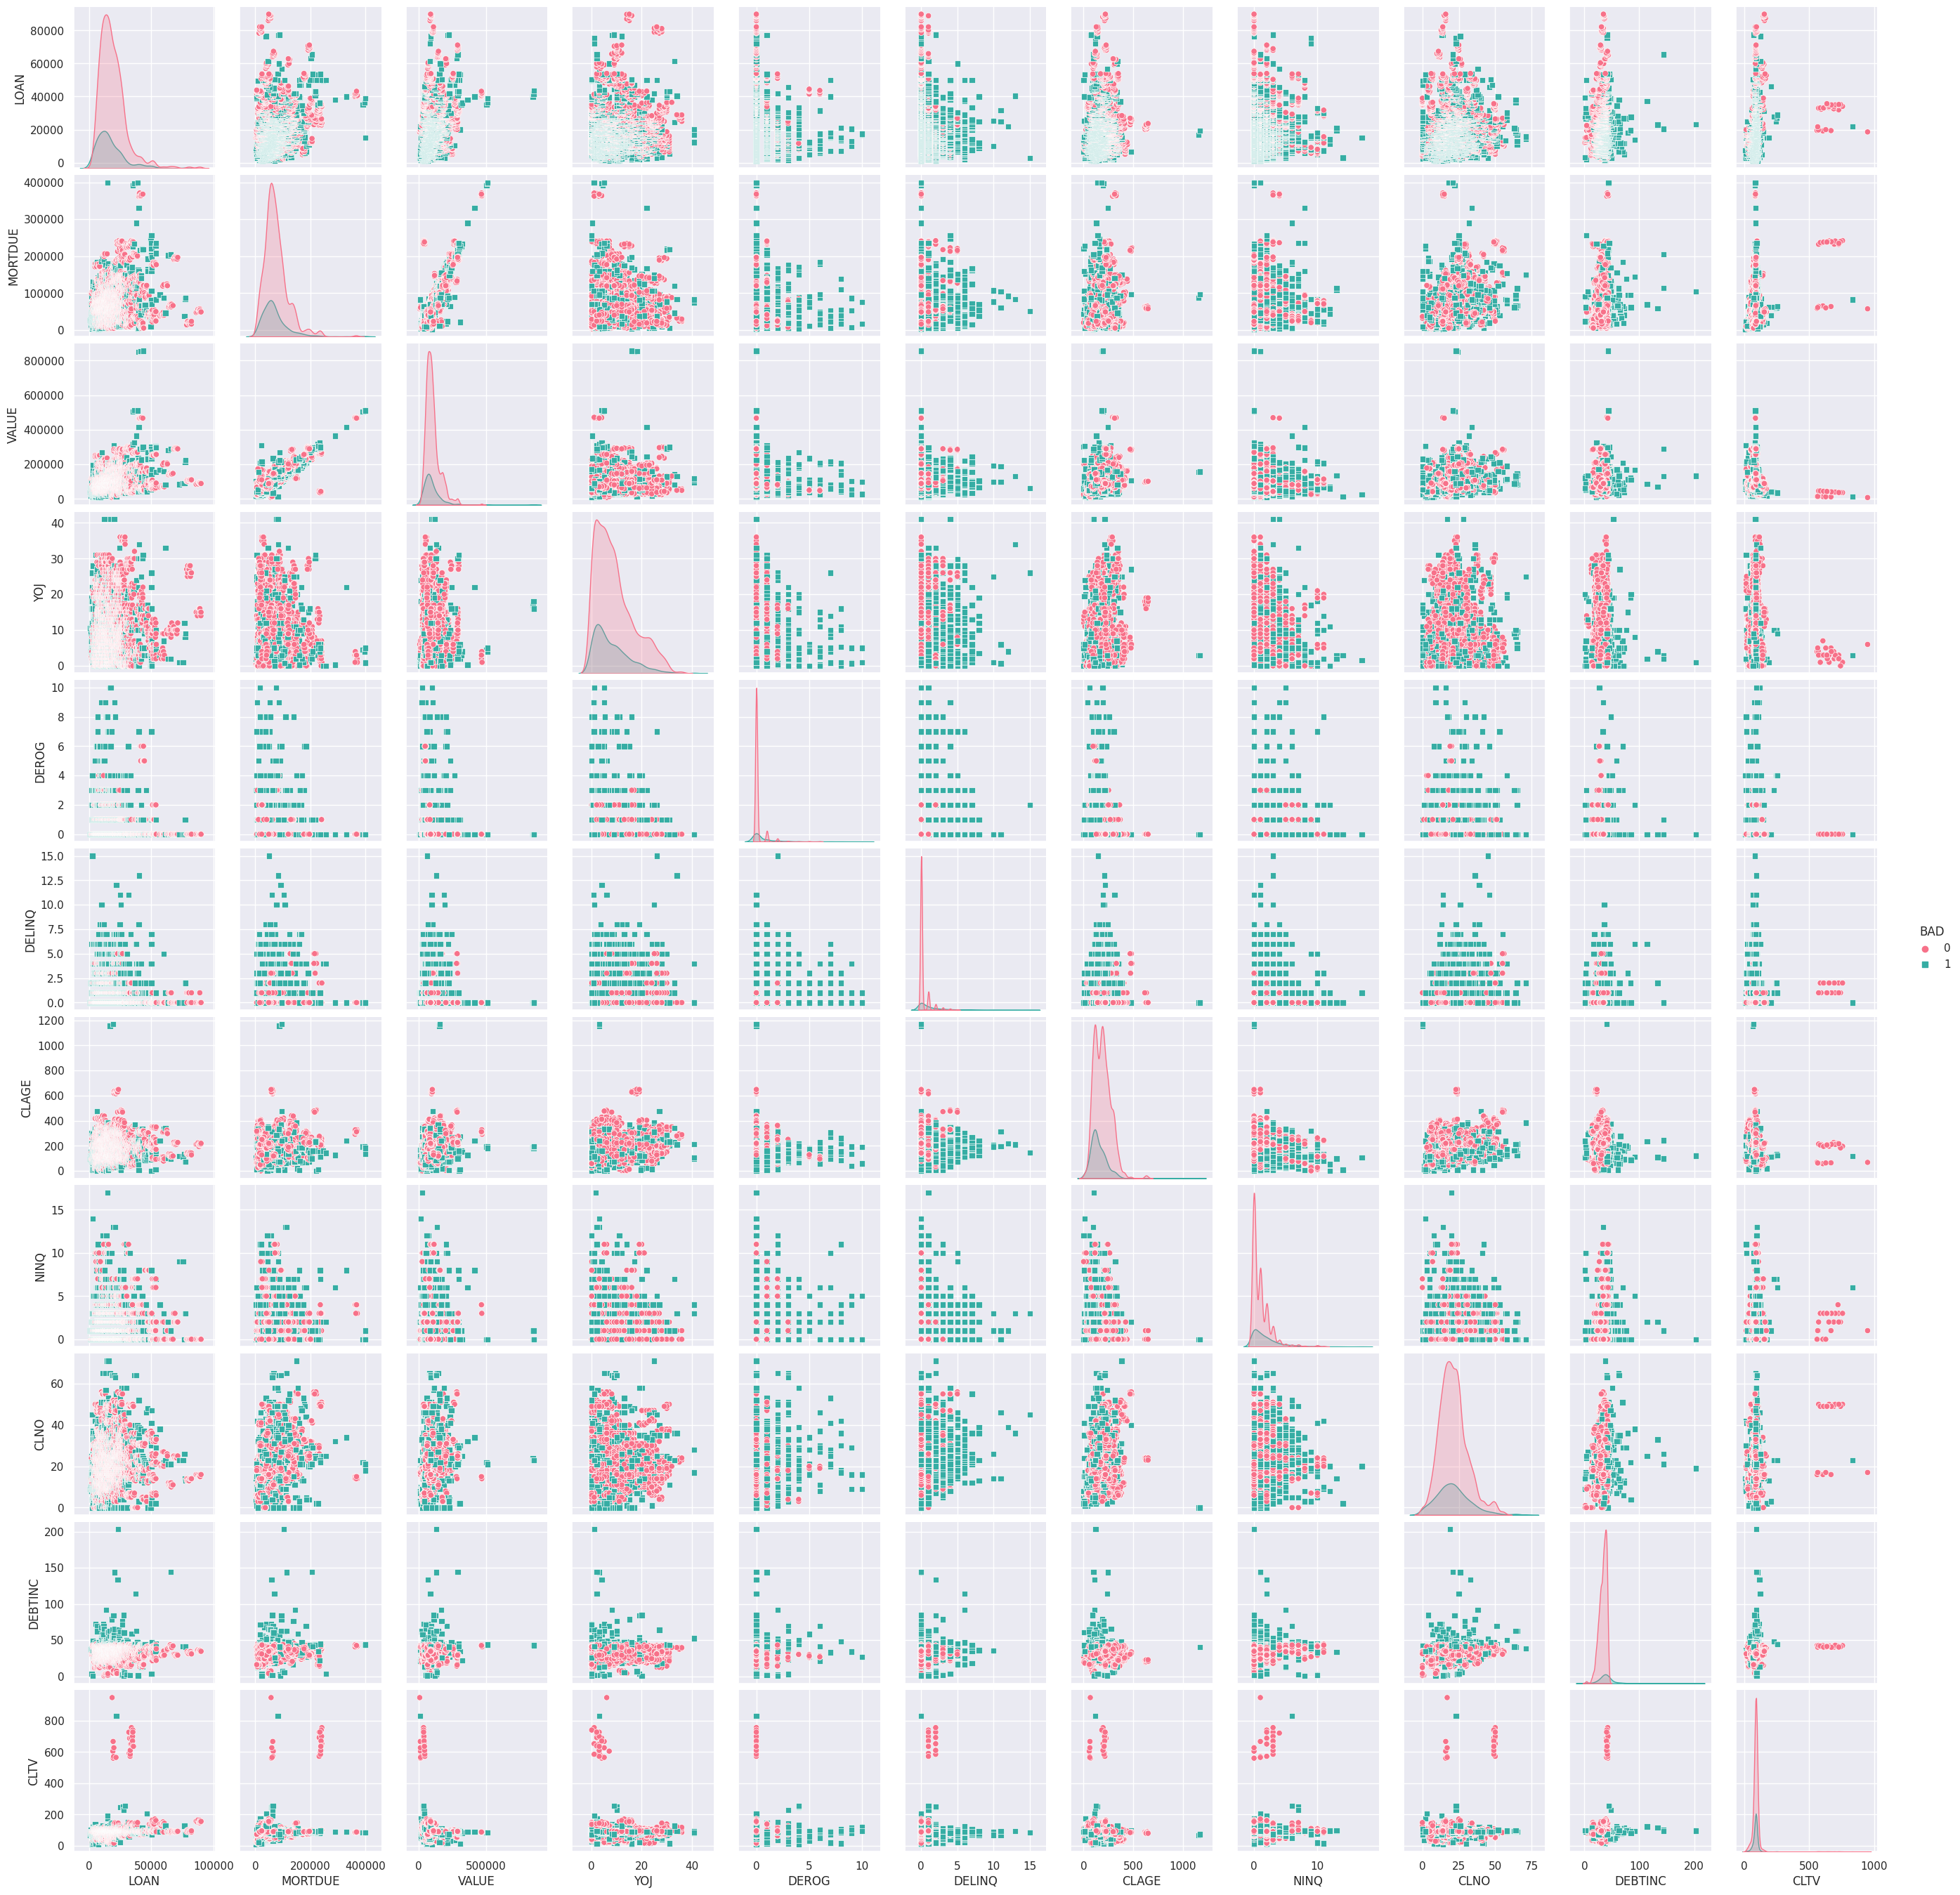

In [ ]:
# Build pairplot for the data with hue = 'BAD'

sns.pairplot(data, hue='BAD', diag_kind='kde', markers=["o", "s"], palette="husl")

# Show the plot
plt.show()

#### Treating Outliers

In [ ]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''

    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1   # IQR Range
    Lower_Whisker = Q1 - 1.5 * IQR  # Define lower whisker
    Upper_Whisker = Q3 + 1.5 * IQR  # Define upper whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)

    return df



In [ ]:
df_raw = data.copy()

numerical_col = df_raw.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

df = treat_outliers_all(df_raw,numerical_col)

#### Adding new columns in the dataset for each column which has missing values

In [ ]:
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0.
#old code
#def add_binary_flag(df,col):
#    '''
#    df: It is the dataframe
#    col: it is column which has missing values
#    It returns a dataframe which has binary falg for missing values in column col
#    '''
#    new_col = str(col)
#    new_col += '_missing_values_flag'
#    df[new_col] = df[col].isna()
#    return df
#------------------------------------------
def add_binary_flag(df, col):
    new_col = str(col) + '_missing_values_flag'
    df[new_col] = df[col].isna()
    return df


In [ ]:
# list of columns that has missing values in it
missing_col = [col for col in df.columns if df[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(df,colmn)


In [ ]:
df.head()

BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0   1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1   1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     0.0   
2   1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3   1  1500  65019.0   89235.5  DebtCon   Other   7.0    0.0     0.0   
4   0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  ...  REASON_missing_values_flag  JOB_missing_values_flag  \
0   94.366667  ...                       False                    False   
1  121.833333  ...                       False                    False   
2  149.466667  ...                       False                    False   
3  173.466667  ...                        True                     True   
4   93.333333  ...                       False                    False   

   YOJ_missing_values_flag  DEROG_missing_values_flag  \
0                    False                      False   
1                    False                      False   
2                    False                      False   
3                     True                       True   
4                    False                      False   

   DELINQ_missing_values_flag  CLAGE_missing_values_flag  \
0                       False                      False   
1                       False                      False   
2                       False                      False   
3                        True                       True   
4                       False                      False   

   NINQ_missing_values_flag  CLNO_missing_values_flag  \
0                     False                     False   
1                     False                     False   
2                     False                     False   
3                      True                      True   
4                     False                     False   

   DEBTINC_missing_values_flag  CLTV_missing_values_flag  
0                         True                     False  
1                         True                     False  
2                         True                     False  
3                         True                      True  
4                         True                     False  

[5 rows x 26 columns]

#### Filling missing values in numerical columns with median and mode in categorical variables

In [ ]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = df.select_dtypes('number')

# Select string and object columns.
cat_data = df.select_dtypes('category').columns.tolist()#df.select_dtypes('object')

# Fill numeric columns with median.

df[num_data.columns] = num_data.apply(lambda x: x.fillna(x.median()))

# Fill object columns with model.

for column in cat_data:
    mode = df[column].mode()[0]
    df[column] = df[column].fillna(mode)



In [ ]:
df.head()

BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0   1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1   1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     0.0   
2   1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3   1  1500  65019.0   89235.5  DebtCon   Other   7.0    0.0     0.0   
4   0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  ...  REASON_missing_values_flag  JOB_missing_values_flag  \
0   94.366667  ...                       False                    False   
1  121.833333  ...                       False                    False   
2  149.466667  ...                       False                    False   
3  173.466667  ...                        True                     True   
4   93.333333  ...                       False                    False   

   YOJ_missing_values_flag  DEROG_missing_values_flag  \
0                    False                      False   
1                    False                      False   
2                    False                      False   
3                     True                       True   
4                    False                      False   

   DELINQ_missing_values_flag  CLAGE_missing_values_flag  \
0                       False                      False   
1                       False                      False   
2                       False                      False   
3                        True                       True   
4                       False                      False   

   NINQ_missing_values_flag  CLNO_missing_values_flag  \
0                     False                     False   
1                     False                     False   
2                     False                     False   
3                      True                      True   
4                     False                     False   

   DEBTINC_missing_values_flag  CLTV_missing_values_flag  
0                         True                     False  
1                         True                     False  
2                         True                     False  
3                         True                      True  
4                         True                     False  

[5 rows x 26 columns]

In [ ]:
print("DataFrame After Treating Missing Values:")
print(df)

DataFrame After Treating Missing Values:
     BAD   LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0      1   1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1      1   1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     0.0   
2      1   1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3      1   1500  65019.0   89235.5  DebtCon   Other   7.0    0.0     0.0   
4      0   1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   
...   ..    ...      ...       ...      ...     ...   ...    ...     ...   
5955   0  41600  57264.0   90185.0  DebtCon   Other  16.0    0.0     0.0   
5956   0  41600  54576.0   92937.0  DebtCon   Other  16.0    0.0     0.0   
5957   0  41600  54045.0   92924.0  DebtCon   Other  15.0    0.0     0.0   
5958   0  41600  50370.0   91861.0  DebtCon   Other  14.0    0.0     0.0   
5959   0  41600  48811.0   88934.0  DebtCon   Other  15.0    0.0     0.0   

           CLAGE  ...  REASON_missing_values_f

## **Important Insights from EDA**

What are the the most important observations and insights from the data based on the EDA performed?

## **Model Building - Approach**
1. Data preparation
2. Partition the data into train and test set
3. Fit on the train data
4. Tune the model and prune the tree, if required
5. Test the model on test set

## **Data Preparation**

### **Separating the target variable from other variables**

In [ ]:
#@title
# Drop the dependent variable from the dataframe and create the X(independent variable) matrix

X = data.drop('BAD', axis=1)

# Create dummy variables for the categorical variables - Hint: use the get_dummies() function

X = pd.get_dummies(X, drop_first=True)

# Create y(dependent varibale)

y = data['BAD']

df=data



### **Splitting the data into 70% train and 30% test set**

In [ ]:
#@title
from sklearn.model_selection import train_test_split
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)


In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (4172, 17)
Shape of test set :  (1788, 17)
Percentage of classes in training set:
0    0.802013
1    0.197987
Name: BAD, dtype: float64
Percentage of classes in test set:
0    0.79698
1    0.20302
Name: BAD, dtype: float64


In [ ]:
# Split the data into training 80 and test set 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (4768, 17)
Shape of test set :  (1192, 17)
Percentage of classes in training set:
0    0.797609
1    0.202391
Name: BAD, dtype: float64
Percentage of classes in test set:
0    0.812081
1    0.187919
Name: BAD, dtype: float64


## **Model Evaluation Criterion**

#### After understanding the problem statement, think about which evaluation metrics to consider and why.

In [ ]:
#creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [ ]:
# Create y(dependent variable)
y = df["BAD"]

print(y.value_counts())

# Check for missing values in the dataset
missing_values = X_train.isnull().sum().sort_values(ascending=False)
print(missing_values[missing_values > 0])

0    4771
1    1189
Name: BAD, dtype: int64
DEBTINC    1020
DEROG       558
CLTV        482
DELINQ      451
YOJ         412
MORTDUE     410
NINQ        391
CLAGE       258
CLNO        181
VALUE        93
dtype: int64


In [ ]:
# Fill missing values in numerical columns with the median
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_train.median())  # use median values from the training set to avoid data leakage

### **Build a Logistic Regression Model**

In [ ]:
#Logistic Regression Model for 70/30 data split
from sklearn.linear_model import LogisticRegression


# Define the Logistic Regression model
logistic_model = LogisticRegression(random_state=30)

# Fit the model on the training data
logistic_model.fit(X_train, y_train)




LogisticRegression(random_state=30)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      3803
           1       0.80      0.05      0.09       965

    accuracy                           0.80      4768
   macro avg       0.80      0.52      0.49      4768
weighted avg       0.80      0.80      0.73      4768



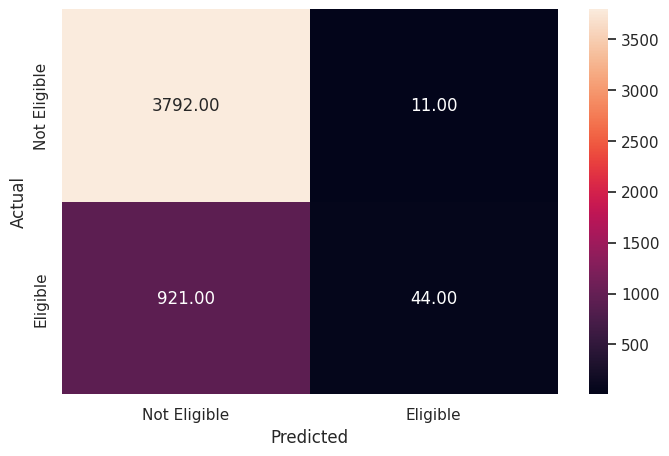

In [ ]:
#Prediction for train set
y_train_pred = logistic_model.predict(X_train)

#checking the performance on the train dataset
metrics_score(y_train, y_train_pred)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       968
           1       0.69      0.04      0.08       224

    accuracy                           0.82      1192
   macro avg       0.75      0.52      0.49      1192
weighted avg       0.79      0.82      0.74      1192



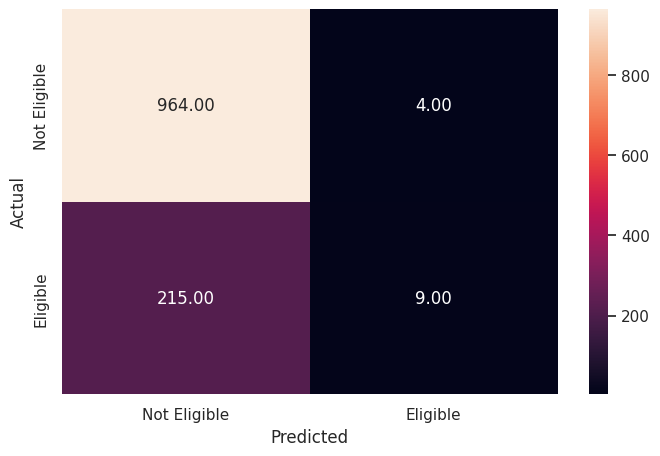

In [ ]:
#Predict for test set
y_test_pred = logistic_model.predict(X_test)

#checking the performance on the test dataset
metrics_score(y_test, y_test_pred)



In [ ]:
# Function to calculate metrics and return them as a tuple
def calculate_metrics(model, X_train, X_test, y_train, y_test):
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    train_recall = recall_score(y_train, model.predict(X_train))
    train_precision = precision_score(y_train, model.predict(X_train))
    test_precision = precision_score(y_test, model.predict(X_test))
    return train_accuracy, test_accuracy, train_recall, train_precision, test_precision
# Get metrics for the logistic regression model
logistic_metrics = calculate_metrics(logistic_model, X_train, X_test, y_train, y_test)

# Display the results
model_name = 'Logistic Regression'
results = [model_name] + list(logistic_metrics)
headers = ['Model Name', 'Train Accuracy', 'Test Accuracy', 'Train Recall', 'Train Precision', 'Test Precision']

print("\t".join(headers))
print("\t".join(map(str, results)))

Model Name	Train Accuracy	Test Accuracy	Train Recall	Train Precision	Test Precision
Logistic Regression	0.8045302013422819	0.8162751677852349	0.04559585492227979	0.8	0.6923076923076923


#### Let's check the coefficients, and check which variables are important and how they affect the process of loan approval

In [ ]:
# Printing the coefficients of logistic regression
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficients": logistic_model.coef_[0]})
coefficients.sort_values("Coefficients", ascending=False, inplace=True)
print(coefficients)

           Feature  Coefficients
9          DEBTINC      0.047883
5           DELINQ      0.017533
8             CLNO      0.014126
7             NINQ      0.011346
4            DEROG      0.009541
13       JOB_Other      0.001021
11  REASON_HomeImp      0.000379
16        JOB_Self      0.000321
15       JOB_Sales      0.000318
1          MORTDUE      0.000001
2            VALUE     -0.000003
0             LOAN     -0.000011
14     JOB_ProfExe     -0.000437
12      JOB_Office     -0.001216
3              YOJ     -0.003434
6            CLAGE     -0.007271
10            CLTV     -0.019318


**Insights: **
- Model Performance: The model's accuracy on the training and test sets is 80% to 82%. The model does seem to overfitting the test set. f1-score for the class 1 (loan defaulted) is 8%, which suggests that the model is not capable to  predict loan defaults.
- Precision: The precision for the default class (1, loan default) is 69% while the recall is 4%. This means the model can identify only 4% of the actual loan default cases, but when it does, it is correct 69% of the time. This suggests that the model is biased towards the loan repaid class (0, repaid).
- Coefficients: The logistic regression model's coefficients indicate the importance of each feature in predicting loan defaults. Positive coefficients increase the probability of default, while negative coefficients decrease it.
-- DEBTINC, DELINQ (Number of delinquent credit lines), CLNO, NINQ, DEROG have the highest positive coefficients: 0.05, 0.018, 0.014, 0.011, 0.009. This means that as debt-to-income ratio increases the chances of default also increases, as the number of delinquent credit lines increases, the probability of loan default also increases.
-- VALUE: This feature has the most negative coefficient (-0.000003), indicating that as the property value increases, the probability of loan default decreases.

- In conclusion, even though the logistic regression model has a high overall accuracy score, it lacks to predict loan defaults accurately. This could be as result of missing values that were replaced with dummy variables. The coefficients provide some insights into the importance of individual features, however a low number for each category highlights the need for a more sophisticated model/s or techniques to improve the performance of a particular model.


### **Build a Decision Tree Model**

#### Data Preparation for the tree based model

In [ ]:
# Add binary flags
# List of columns that has missing values in it
missing_col = [col for col in data.columns if data[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(data,colmn)


In [ ]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = data.select_dtypes('number')

# Select string and object columns.
cat_data = data.select_dtypes('category').columns.tolist()#df.select_dtypes('object')

# Fill numeric columns with median.

data[num_data.columns] = num_data.apply(lambda x: x.fillna(x.median()))

# Fill object columns with model.

for column in cat_data:
    mode = data[column].mode()[0]
    data[column] = data[column].fillna(mode)


#### Separating the target variable y and independent variable x

In [ ]:
# Drop dependent variable from dataframe and create the X(independent variable) matrix
X = data.drop(['BAD'], axis=1)

# Create dummy variables for the categorical variables - Hint: use the get_dummies() function
X = pd.get_dummies(X)

# Create y(dependent varibale)
y = data['BAD']


#### Split the data

In [ ]:
# Split the data into training and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)


In [ ]:
#Defining Decision tree model with class weights class_weight={0: 0.2, 1: 0.8}

dt = DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=30)

In [ ]:
#fitting Decision tree model

dt.fit(X_train, y_train)


DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=30)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3346
           1       1.00      1.00      1.00       826

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



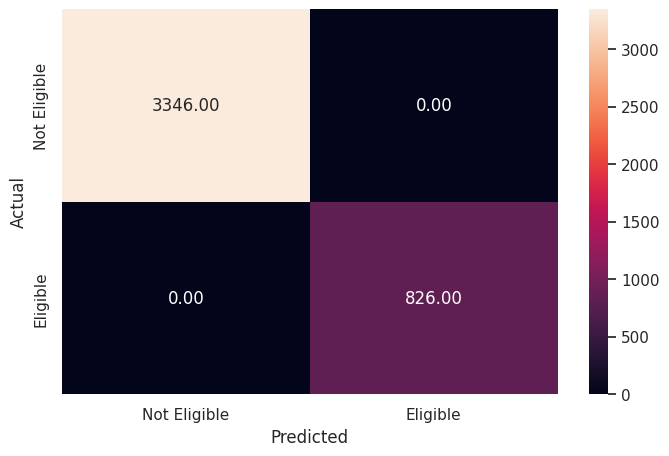

In [ ]:
# Checking performance on the training data
y_train_pred = dt.predict(X_train)
metrics_score(y_train, y_train_pred)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1425
           1       0.71      0.64      0.67       363

    accuracy                           0.87      1788
   macro avg       0.81      0.79      0.80      1788
weighted avg       0.87      0.87      0.87      1788



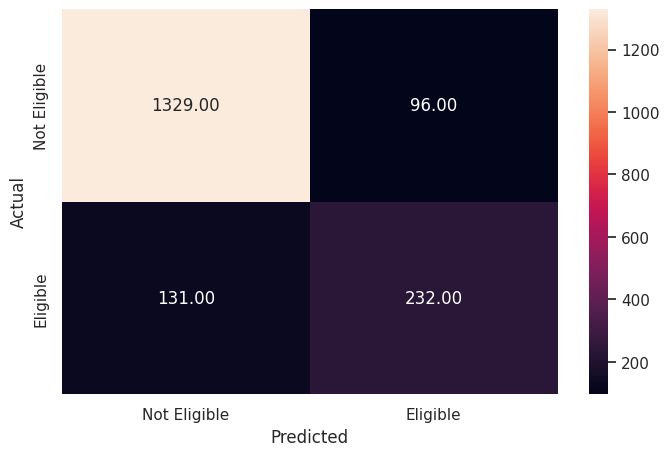

In [ ]:
# Checking performance on the testing data
y_test_pred = dt.predict(X_test)
metrics_score(y_test, y_test_pred)

In [ ]:
# Extract feature importances
importances = dt.feature_importances_

# Create a dataframe of feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances.sort_values('Importance', ascending=False, inplace=True)

# Print the feature importances
print(feature_importances)

                        Feature    Importance
21  DEBTINC_missing_values_flag  3.458734e-01
9                       DEBTINC  1.245335e-01
6                         CLAGE  7.963824e-02
0                          LOAN  5.685025e-02
2                         VALUE  5.583066e-02
3                           YOJ  5.515482e-02
1                       MORTDUE  4.991683e-02
5                        DELINQ  4.476273e-02
8                          CLNO  4.344058e-02
10                         CLTV  3.829551e-02
7                          NINQ  2.025978e-02
4                         DEROG  1.279610e-02
16    DEROG_missing_values_flag  1.261939e-02
12    VALUE_missing_values_flag  1.082815e-02
29                    JOB_Sales  8.359593e-03
11  MORTDUE_missing_values_flag  6.645484e-03
22     CLTV_missing_values_flag  5.793730e-03
24               REASON_HomeImp  5.729626e-03
26                   JOB_Office  5.487329e-03
28                  JOB_ProfExe  4.021280e-03
13   REASON_missing_values_flag  3

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score
import numpy as np
import pandas as pd
import sklearn.metrics as metrics

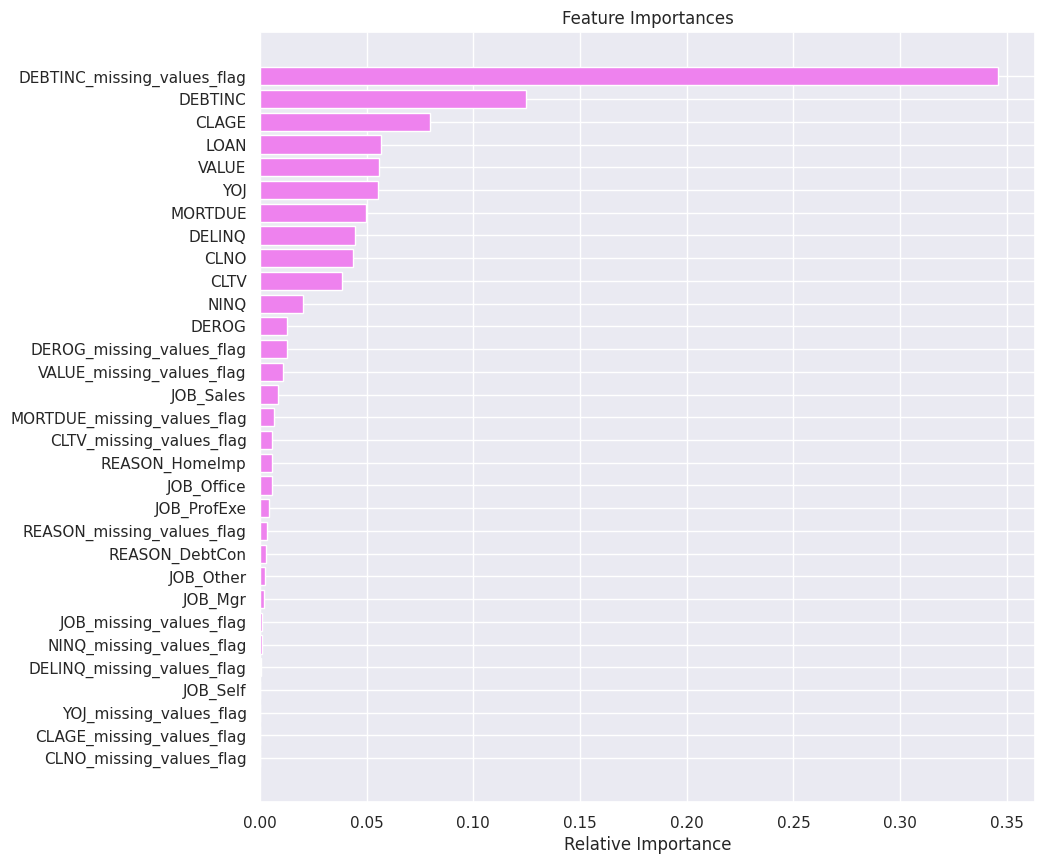

In [ ]:
# Plotting the feature importance
importances = dt.feature_importances_
features = X.columns

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)),[features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()


### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.**
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth**

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.




#### Using GridSearchCV for Hyperparameter tuning on the model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score
import numpy as np
import sklearn.metrics as metrics

In [ ]:
# Choose the type of classifier.
dt_tuned = DecisionTreeClassifier()


# Grid of parameters to choose from
param_grid = {'max_depth': np.arange(2, 10),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Define the scoring metric
scoring = ['accuracy', 'recall', 'precision', 'f1']


# Run the grid search
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, scoring=scoring, cv=5, refit='accuracy', verbose=1)

# Fit the GridSearch on train dataset
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters: ", grid_search.best_params_)

# Set the clf to the best combination of parameters
dt_tuned = grid_search.best_estimator_

# Fit the best algorithm to the data.
dt_tuned.fit(X_train, y_train)


Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best parameters:  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10}


DecisionTreeClassifier(max_depth=3, min_samples_leaf=10)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      3346
           1       0.74      0.69      0.71       826

    accuracy                           0.89      4172
   macro avg       0.83      0.81      0.82      4172
weighted avg       0.89      0.89      0.89      4172



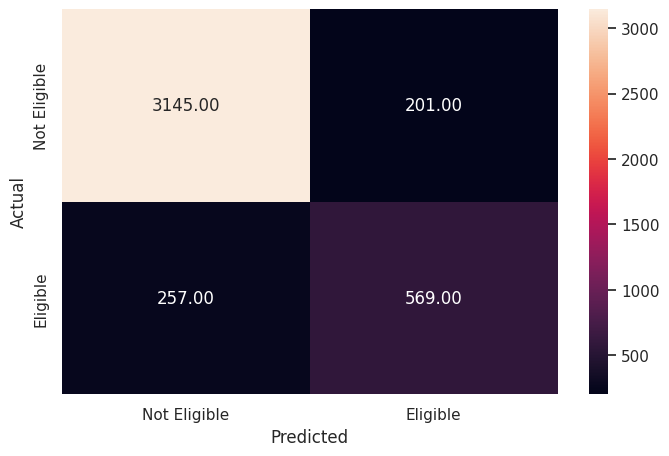

In [ ]:
# Checking performance on the training data based on the tuned model
y_train_pred = dt_tuned.predict(X_train)
metrics_score(y_train, y_train_pred)


#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      1425
           1       0.69      0.65      0.67       363

    accuracy                           0.87      1788
   macro avg       0.80      0.79      0.79      1788
weighted avg       0.87      0.87      0.87      1788



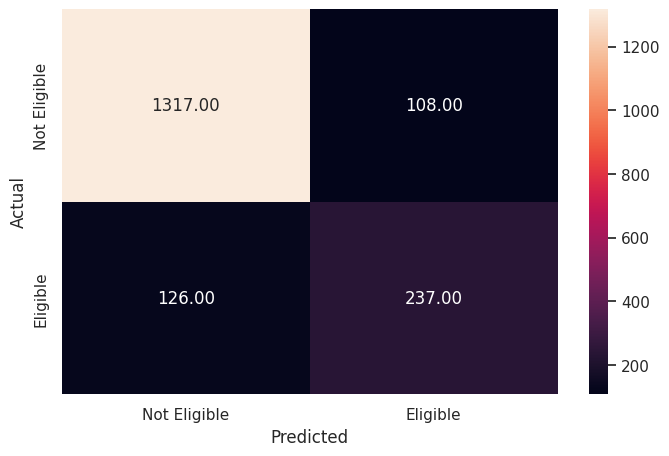

In [ ]:
# Checking performance on the testing data based on the tuned model
# Check performance on test data
y_test_pred = dt_tuned.predict(X_test)
metrics_score(y_test, y_test_pred)

#### Plotting the Decision Tree

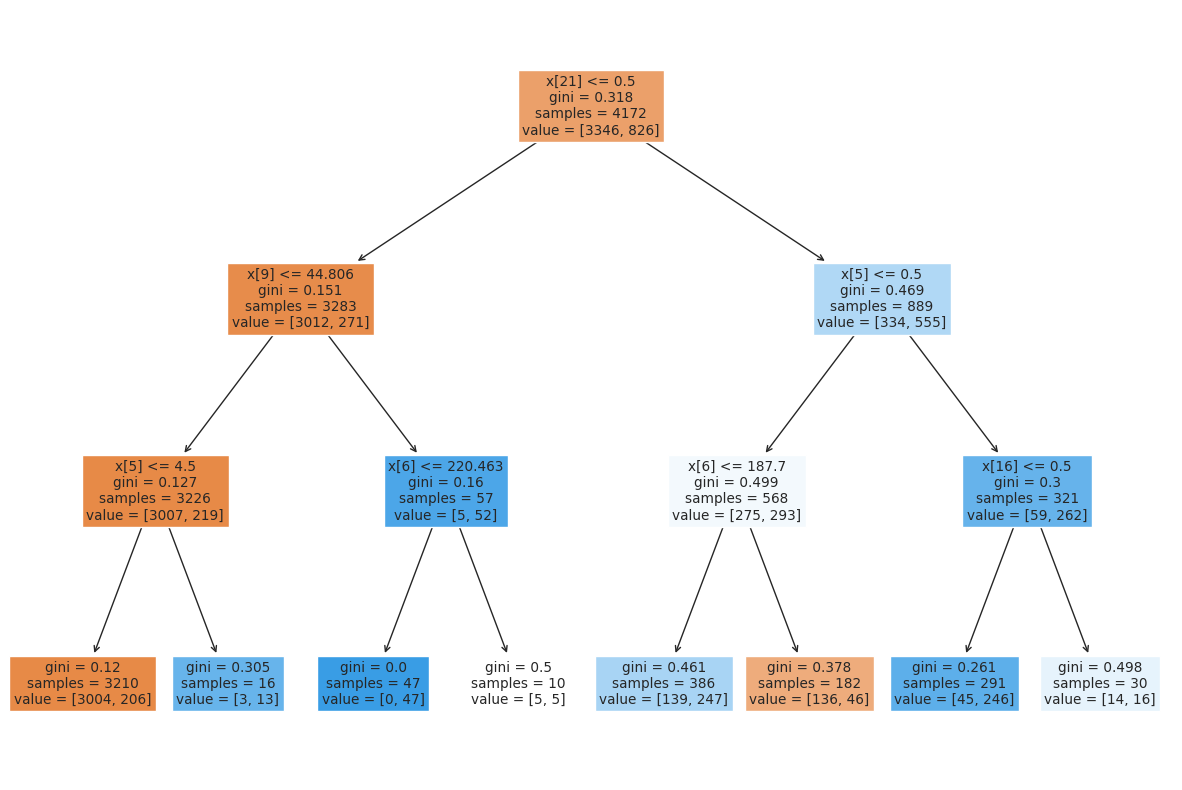

In [ ]:
# Plot the decision  tree and analyze it to build the decision rule

# Import necessary libraries
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(15,10))
plot_tree(dt_tuned, filled=True)
plt.show()



In [ ]:
# Extract feature importances
importances = dt_tuned.feature_importances_

# Create a dataframe of feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances.sort_values('Importance', ascending=False, inplace=True)

# Print the feature importances
print(feature_importances)



                        Feature  Importance
21  DEBTINC_missing_values_flag    0.693833
9                       DEBTINC    0.134955
5                        DELINQ    0.092652
6                         CLAGE    0.069612
16    DEROG_missing_values_flag    0.008948
24               REASON_HomeImp    0.000000
19     NINQ_missing_values_flag    0.000000
20     CLNO_missing_values_flag    0.000000
22     CLTV_missing_values_flag    0.000000
23               REASON_DebtCon    0.000000
0                          LOAN    0.000000
18    CLAGE_missing_values_flag    0.000000
26                   JOB_Office    0.000000
27                    JOB_Other    0.000000
28                  JOB_ProfExe    0.000000
29                    JOB_Sales    0.000000
25                      JOB_Mgr    0.000000
15      YOJ_missing_values_flag    0.000000
17   DELINQ_missing_values_flag    0.000000
1                       MORTDUE    0.000000
14      JOB_missing_values_flag    0.000000
13   REASON_missing_values_flag 

Decision Tree – Hyperparameter Tuning
**Observations:**
1.	Hyperparameter tuning using GridSearchCV has improved the model's performance slightly. Accuracy on test came at 87%.
2.	The precision score for loan repaid class is 91%, which means that of all the customers predicted as Eligible, 91% of them will actually repay their loan. The model can predict default with 69% precision.  
3.	The number of most important variables for this model in determining loan eligibility have increased and are DEBTINC, DELINQ, and CLAGE. The importance level for DEBTINC has increased in this model which means this feature is important in making loan approval decisions.

**The business rules deduced from the decision tree:**

•	When DEBTINC is less than or equal to 44.81%, DELINQ is less than or equal to 4.5 (less then 1.5 lines delinquent on credit) there is a better chance of seeing that loan repaid.

•	If DEBTINC is over 44.81% and DELINQ is greater than 4.5, the loan should not be granted as chances of repayment are severely diminished.
•	There appears to be a small positive repayment correlation between DEBTINC less than 44.81% and CLAGE (credit line age) less or equal to 220 months.

•	 Missing DEBTINC data appears to be driving majority of the decision with this model, hance business process needs to be improved such as to all for missing values to always be completed.

**Insights:**
1.	The decision tree model, once tuned with hyperparameter, has improved its performance on the test set, which makes it a better model for loan eligibility and repayment predictions.
2.	The model is still not perfect, as it misclassifies 35% of Eligible customers as Not Eligible. The model could result in a potential loss of business for the organization.
3.	The most important variables in this model are: debt-to-income ratio (DEBTINC), number of delinquent lines (DELINQ), and age of credit history or how experienced the customer is in paying debts (CLAGE).
4.	Based on the decision tree, the bank should prioritize customers with a lower debt-to-income ratio and a longer credit history for loan approval. Also, customers with fewer delinquencies are more likely to maintain their new loan to its maturity.



### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction.

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [ ]:
#@title
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics

from sklearn.metrics import confusion_matrix, classification_report,recall_score,precision_score, accuracy_score

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Defining Random forest CLassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=30)

#### Checking the performance on the train dataset

### **Build a Random Forest model with Class Weights**

In [ ]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0: 0.2, 1: 0.80}, random_state = 30)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=30)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3346
           1       1.00      1.00      1.00       826

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



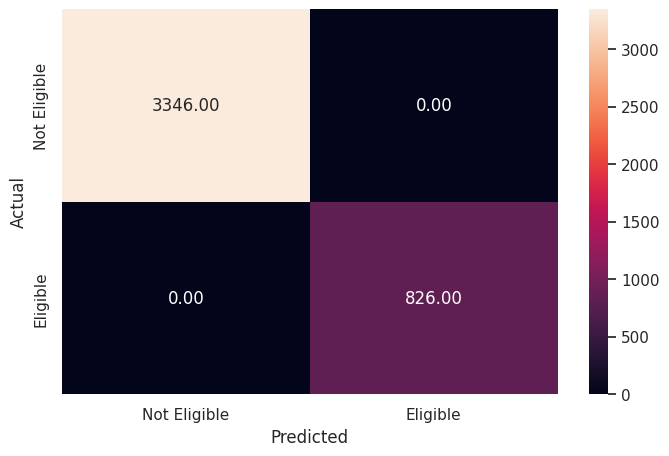

In [ ]:
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1425
           1       0.82      0.67      0.74       363

    accuracy                           0.90      1788
   macro avg       0.87      0.82      0.84      1788
weighted avg       0.90      0.90      0.90      1788



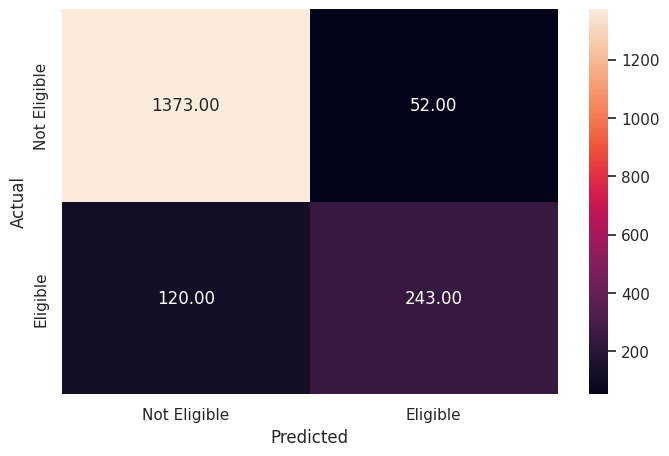

In [ ]:
# Checking performance on the test data
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)


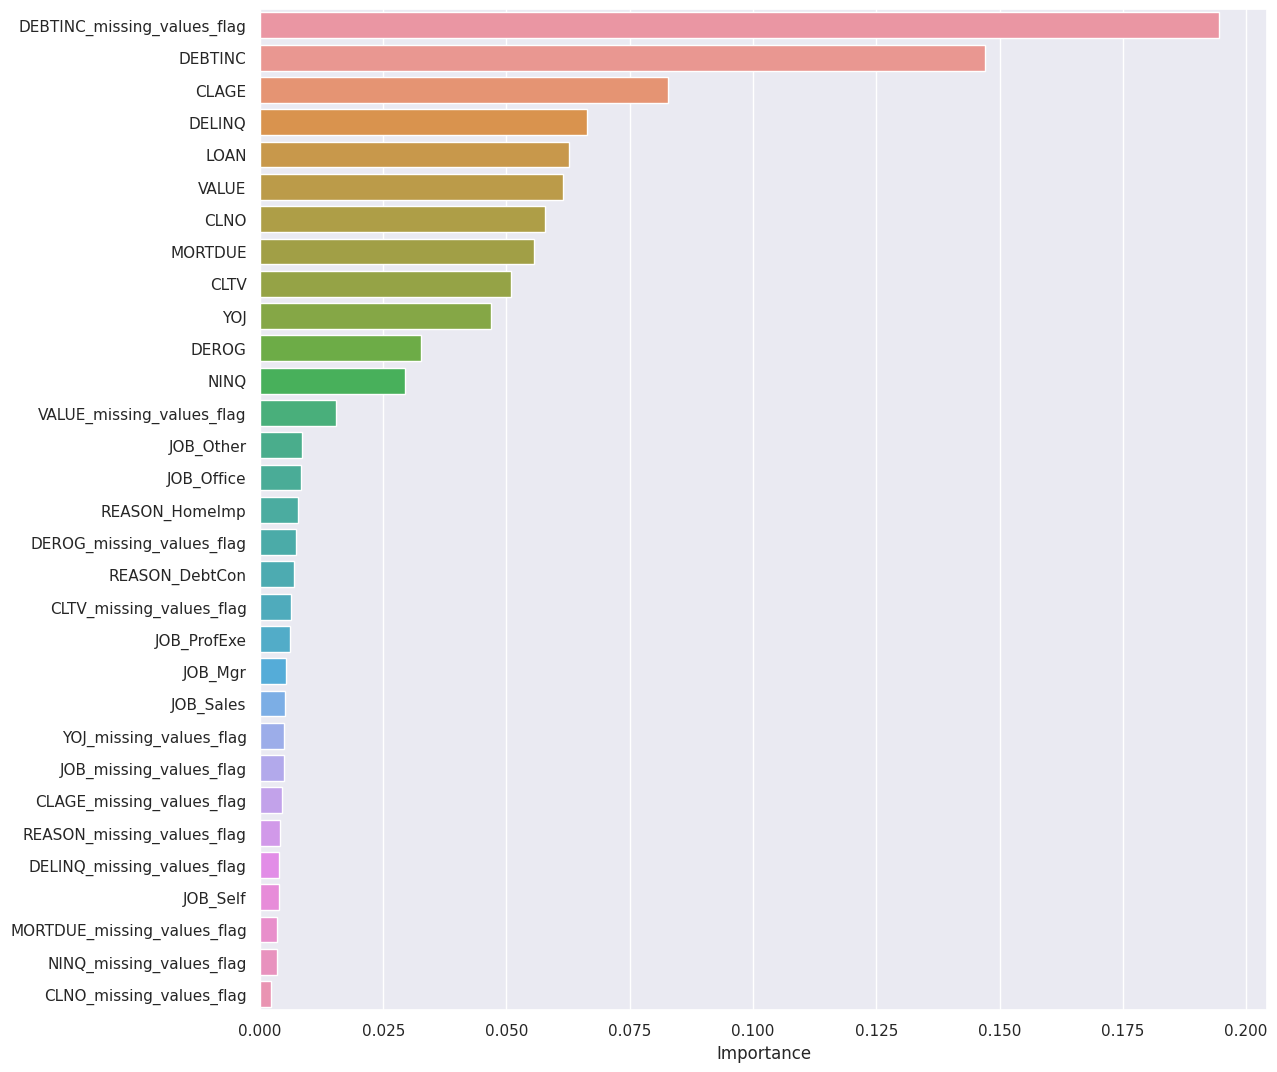

In [ ]:
# feature importance of the Random Forest classifier
importances = rf_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x= importance_df.Importance, y=importance_df.index);

### **Tuning the Random Forest**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.**
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.


**n_estimators**: The number of trees in the forest.

**min_samples_split**: The minimum number of samples required to split an internal node:

**min_samples_leaf**: The minimum number of samples required to be at a leaf node.

**max_features{“auto”, “sqrt”, “log2”, 'None'}**: The number of features to consider when looking for the best split.

- If “auto”, then max_features=sqrt(n_features).

- If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).

- If “log2”, then max_features=log2(n_features).

- If None, then max_features=n_features.



#### **Warning:** This may take a long time depending on the parameters you tune.

In [ ]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.2, 1: 0.80}, random_state = 30)

# Grid of parameters to choose from
params_rf = {
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_
# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, max_features='auto',
                       min_samples_leaf=3, n_estimators=250, random_state=30)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      3346
           1       0.87      0.99      0.92       826

    accuracy                           0.97      4172
   macro avg       0.93      0.98      0.95      4172
weighted avg       0.97      0.97      0.97      4172



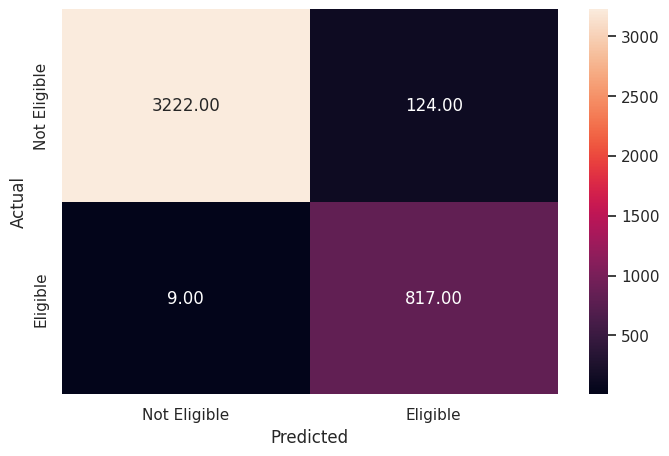

In [ ]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train_rf_tuned)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1425
           1       0.72      0.76      0.74       363

    accuracy                           0.89      1788
   macro avg       0.83      0.84      0.83      1788
weighted avg       0.89      0.89      0.89      1788



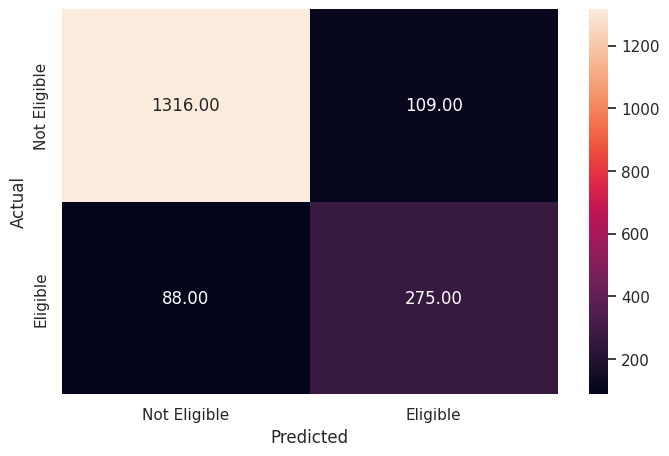

In [ ]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test_rf_tuned)

#### Plot the Feature importance of the tuned Random Forest

<Axes: xlabel='Importance'>

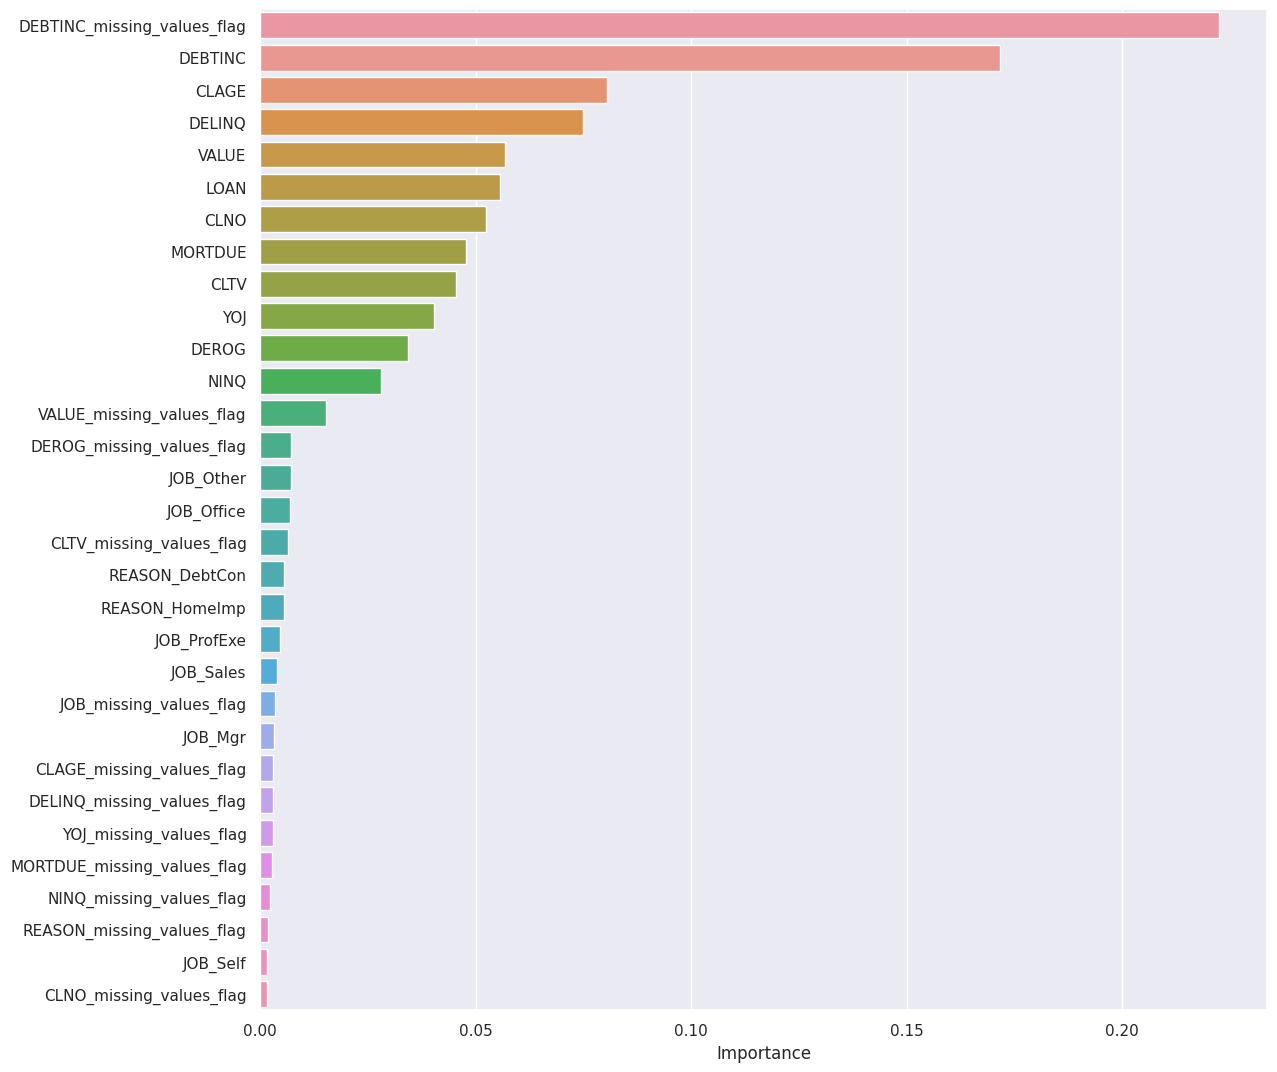

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
importances = rf_estimator_tuned.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x= importance_df.Importance, y= importance_df.index)

### **Comparing Model Performances**

In [ ]:
#@title
def get_recall_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list
    a.append(test_recall) # adding test recall to list

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

    return a # returning the list with train and test scores

In [ ]:

##  Function to calculate precision score
def get_precision_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [ ]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))

    return c # returning the list with train and test scores

In [ ]:
# Make the list of all the model names

models = [dt,dt_tuned,rf_estimator,rf_estimator_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
     # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])

    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [ ]:

# Mention the Model names in the list. for example 'Model': ['Decision Tree', 'Tuned Decision Tree'..... write the names of all model built]

comparison_frame = pd.DataFrame({'Model':['Decision Tree','Decision Tree Tuned', 'Random Forest', 'Random Forest Tuned'],
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test})
comparison_frame

Model  Train_Accuracy  Test_Accuracy  Train_Recall  \
0        Decision Tree        1.000000       0.873043      1.000000   
1  Decision Tree Tuned        0.890221       0.869128      0.688862   
2        Random Forest        1.000000       0.903803      1.000000   
3  Random Forest Tuned        0.968121       0.889821      0.989104   

   Test_Recall  Train_Precision  Test_Precision  
0     0.639118         1.000000        0.707317  
1     0.652893         0.738961        0.686957  
2     0.669421         1.000000        0.823729  
3     0.757576         0.868225        0.716146

In [ ]:
# Function to calculate metrics and return them as a tuple
def calculate_metrics(model, X_train, X_test, y_train, y_test):
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))

    train_recall = recall_score(y_train, model.predict(X_train))
    test_recall = recall_score(y_test, model.predict(X_test))

    train_precision = precision_score(y_train, model.predict(X_train))
    test_precision = precision_score(y_test, model.predict(X_test))

    return train_accuracy, test_accuracy, train_recall, test_recall, train_precision, test_precision

# Get metrics for the logistic regression model
logistic_metrics = calculate_metrics(logistic_model, X_train, X_test, y_train, y_test)

# Display the results
model_name = 'Logistic Regression'
results = [model_name] + list(logistic_metrics)
headers = ['Model Name', 'Train Accuracy', 'Test Accuracy', 'Train Recall', 'Train Precision', 'Test Precision']

print("\t".join(headers))
print("\t".join(map(str, results)))


Model Name	Train Accuracy	Test Accuracy	Train Recall	Train Precision	Test Precision
Logistic Regression	0.8045302013422819	0.8162751677852349	0.04559585492227979	0.04017857142857143	0.8	0.6923076923076923


**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):**
Performance across various techniques is as follows:
- Logistic regression yields relatively low accuracy, recall, and precision scores on both training and test data, indicating subpar performance.
- The decision tree exhibits high accuracy and recall scores on training data but lower scores on test data, suggesting overfitting.
- The hypertuned decision tree outperforms the regular decision tree, demonstrating improved recall and F1-score on the test data.
- The random forest classifier, especially after tuning, achieves the highest accuracy and precision scores on both training and test data, along with commendable recall scores.
Reasons why the Random Forest Classifier performs better:
- The random forest classifier attains superior accuracy and precision scores on both training and test data, showcasing its ability to accurately identify both positive and negative cases.
- The model also achieves notable recall scores, indicating its proficiency in identifying most positive cases.
- The utilization of multiple decision trees in the random forest mitigates overfitting, enhancing performance on test data.
There might be potential to enhance the performance of the hypertuned decision tree by exploring additional hyperparameters or considering a different algorithm.

Further improvement in the random forest classifier's performance may be achievable by investigating different parameters, such as the number of trees or the depth of each tree.
Across all three models, variables associated with a borrower's debt (e.g., DEBTINC, CLAGE) emerge as crucial predictors of credit risk.
Other important variables include those related to the borrower's credit history (e.g., DELINQ, DEROG) and employment status (e.g., JOB_Other, JOB_Sales).


**2. Refined insights:**
Key insights derived from the data and observations include:
- Significant variables for predicting credit risk encompass DEBTINC, CLAGE, DELINQ, CLNO, YOJ, and DEROG.
- Variables influencing defaults differ across models, with the debt-to-income ratio being consistently important.
- Missing data flags, such as DEBTINC_missing_values_flag, YOJ_missing_values_flag, DEROG_missing_values_flag, and DELINQ_missing_values_flag, demonstrate some level of importance, suggesting that missing data might possess predictive value.
- The random forest model excels at capturing non-linear relationships between predictors and the target variable.
- Logistic regression highlights the impact of variables like DELINQ, NINQ, and DEROG on credit risk, emphasizing the need for more complex models.
- Overfitting in the regular decision tree underscores the importance of proper model selection and hyperparameter tuning.
- The models developed can assist the credit department in making more informed and unbiased credit decisions while adhering to Equal Credit Opportunity Act guidelines.
Variables remaining significant post-modeling:
- Variable importance varies across models, but many of the same variables consistently emerge as significant predictors of credit risk.
- Notably, variables related to a borrower's debt and credit history consistently prove important across all three models.

**3. Proposal for the final solution design:**
Based on the evaluation of performance metrics and the importance of features in the models, I recommend the adoption of the Random Forest Classifier with Hyperparameter Tuning as the optimal solution.

This model has exhibited notable accuracy and precision across both the training and test datasets. Furthermore, its analysis of feature importance has successfully identified crucial variables for predicting the target variable, enhancing the decision-making process. Additionally, compared to more intricate models such as neural networks, the Random Forest model is relatively easier to interpret.

Moreover, the Random Forest model provides interpretability through its feature importance metrics, facilitating an explanation of the decision-making process. It enables the identification of significant variables contributing to the model's predictions, a valuable asset in understanding the factors influencing loan approval.

Random Forests exhibit resilience to outliers, non-linearity, and multicollinearity in the data, making them particularly well-suited for this problem where human biases could impact the data.

In summary, the Random Forest Classifier model stands out as the most robust and accurate solution for the given problem. By leveraging multiple decision trees and selecting optimal features for predictions, it demonstrates superior generalization on unseen data. The feature importance analysis also offers insights into the critical factors influencing loan approval. Consequently, the adoption of the Random Forest Classifier with hyperparameter tuning is recommended for constructing a dependable and interpretable model for credit scoring in this specific context.
